<a href="https://colab.research.google.com/github/ayushabhinav/telecom_churn_prediction/blob/main/TelecomeChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


#### Setup

In [150]:
import warnings
from tqdm.notebook import trange, tqdm
from itertools import filterfalse

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
warnings.filterwarnings('ignore')

In [152]:
pd.set_option('max_row', 500)
pd.set_option('max_column', None)

#### Data loading and sanity check

In [153]:
data_file = '/drive/MyDrive/telecom_churn_data.csv'

In [154]:
data = pd.read_csv(data_file)

In [155]:
data.shape

(99999, 226)

In [156]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [157]:
#dropping date columns
date_cols = ["last_date_of_month_6","last_date_of_month_7",	"last_date_of_month_8",	"last_date_of_month_9", 
             "date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8", "date_of_last_rech_data_9",
             "date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8", "date_of_last_rech_9"]
data.drop(columns=date_cols, inplace=True)

In [158]:
#check if mobile number is repeated.
data.mobile_number.value_counts()[data.mobile_number.value_counts()>1]
#unique mobile number are provided.

Series([], Name: mobile_number, dtype: int64)

In [159]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.

#### Revenue generated in good month

In [160]:
# revenue from the good month
data['rev_6_7'] = (data.arpu_6 + data.arpu_7)/2

In [161]:
data.rev_6_7.describe()

count    99999.000000
mean       280.762003
std        310.178292
min       -749.783000
25%        102.992250
50%        198.732500
75%        359.518500
max      31438.461000
Name: rev_6_7, dtype: float64

#### Outlier detection and treatment

In [162]:
# there is outlier in the data
filt = data.rev_6_7 > np.percentile(data.rev_6_7, 99.9)
data[filt].sort_values(by='rev_6_7', ascending=False).loc[:,['rev_6_7', 'arpu_6', 'arpu_7']]

,rev_6_7,arpu_6,arpu_7
38610,31438.4610,27731.088,35145.834
51314,15055.8865,15487.684,14624.089
67717,14040.7470,11261.349,16820.145
33019,9782.2630,10955.066,8609.460
98208,8688.1765,10877.945,6498.408
69968,7567.6215,7748.779,7386.464
48388,7241.6360,7283.872,7199.400
61944,6625.1795,26.240,13224.119
93779,6487.2870,5687.240,7287.334
80414,6360.5780,8598.530,4122.626


In [163]:
# dropping values over 10000 rev
filt = data.rev_6_7 > 10000
data.drop(index=data[filt].index, inplace=True)

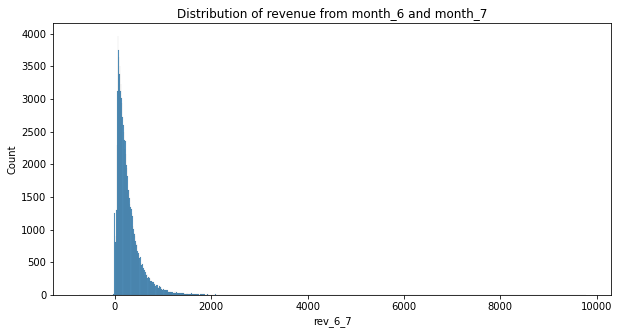

In [164]:
plt.figure(figsize=[10,5])
plt.title('Distribution of revenue from month_6 and month_7')
sns.histplot(data.rev_6_7)
plt.show()
# There are still skewness in data but as we are dealing with HVC, we need to have the high revenue data.

#### Filter high value customer

In [165]:
# filter high value customer - customer above 70%ile value
cutoff_value  = np.percentile(data.rev_6_7, 70)
filt = (data.rev_6_7 >= cutoff_value)
data_hvc = data[filt]
data_hvc.shape

(29999, 215)

#### Missing value detection and treatment

In [166]:
missing_data_stats = pd.DataFrame({
    "abs_missing_count" : data_hvc.isnull().sum(),
    "perc_missing_count" : round(data_hvc.isnull().sum() * 100 / data_hvc.shape[0],2)
})
missing_data_stats

,abs_missing_count,perc_missing_count
mobile_number,0,0.00
circle_id,0,0.00
loc_og_t2o_mou,128,0.43
std_og_t2o_mou,128,0.43
loc_ic_t2o_mou,128,0.43
arpu_6,0,0.00
arpu_7,0,0.00
arpu_8,0,0.00
arpu_9,0,0.00
onnet_mou_6,314,1.05


In [167]:
filt = missing_data_stats.perc_missing_count > 60
missing_data_stats[filt]

,abs_missing_count,perc_missing_count
total_rech_data_6,18452,61.51
total_rech_data_7,18219,60.73
total_rech_data_8,18104,60.35
total_rech_data_9,18467,61.56
max_rech_data_6,18452,61.51
max_rech_data_7,18219,60.73
max_rech_data_8,18104,60.35
max_rech_data_9,18467,61.56
count_rech_2g_6,18452,61.51
count_rech_2g_7,18219,60.73


In [168]:
filt = missing_data_stats.perc_missing_count > 60
zero_imputtation_col_name = missing_data_stats[filt].index
data_hvc[zero_imputtation_col_name]= data_hvc[zero_imputtation_col_name].fillna(0)

In [169]:
filt = missing_data_stats.perc_missing_count > 0
missing_data_stats[filt]
idx_6 = [ i for i in missing_data_stats[filt].index if i.endswith("6")] 
idx_7 = [ i for i in missing_data_stats[filt].index if i.endswith("7")] 
idx_8 = [ i for i in missing_data_stats[filt].index if i.endswith("8")] 
idx_9 = [ i for i in missing_data_stats[filt].index if i.endswith("9")] 
missing_data_stats.loc[idx_6,:]

,abs_missing_count,perc_missing_count
onnet_mou_6,314,1.05
offnet_mou_6,314,1.05
roam_ic_mou_6,314,1.05
roam_og_mou_6,314,1.05
loc_og_t2t_mou_6,314,1.05
loc_og_t2m_mou_6,314,1.05
loc_og_t2f_mou_6,314,1.05
loc_og_t2c_mou_6,314,1.05
loc_og_mou_6,314,1.05
std_og_t2t_mou_6,314,1.05


In [170]:
#delete the row from month 6, 7, and 8 
to_delete_idx = list()
for cols in [idx_6, idx_7, idx_8]:
  for col in cols:
    to_delete_idx.extend(list(data_hvc[data_hvc[col].isnull()].index))
to_delete_idx = set(to_delete_idx)
data_hvc.drop(index=to_delete_idx, inplace=True)

#### Create Aggregare usage variables

In [171]:
data_hvc.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og

In [172]:
# total usage of in-comming, out-going, 2g and 3g data 

col_names = ['total_ic_mou_','total_og_mou_','vol_2g_mb_','vol_3g_mb_']

for mon in (6,7,8,9):
  data_hvc[f"total_usages_{mon}"] = np.sum(data_hvc[[f"{col}{mon}" for col in col_names]], axis=1)

data_hvc[["total_usages_6","total_usages_7","total_usages_8","total_usages_9"]]

,total_usages_6,total_usages_7,total_usages_8,total_usages_9
7,1113.99,1167.28,778.90,0.00
8,612.22,1567.10,200.07,177.09
13,1875.70,364.99,2159.81,1077.95
16,711.67,667.57,527.84,590.30
17,1341.41,3.12,0.00,718.21
...,...,...,...,...
99970,313.47,916.41,754.62,651.59
99974,569.05,469.82,417.06,457.12
99981,1360.82,1099.85,1709.92,455.84
99986,2951.81,2951.24,2973.27,2592.97


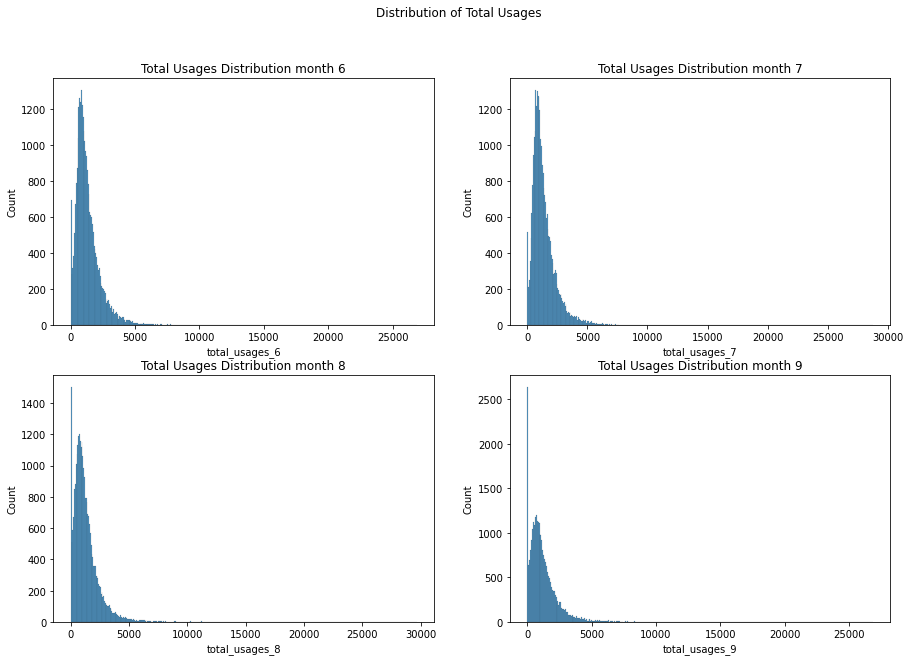

In [173]:
# plotting the total usgaes pattern for users in different month
fig = plt.figure(figsize=[15,10])
plt.subplot(2,2,1)
plt.title("Total Usages Distribution month 6")
sns.histplot(data_hvc.total_usages_6)
plt.subplot(2,2,2)
plt.title("Total Usages Distribution month 7")
sns.histplot(data_hvc.total_usages_7)
plt.subplot(2,2,3)
plt.title("Total Usages Distribution month 8")
sns.histplot(data_hvc.total_usages_8)
plt.subplot(2,2,4)
plt.title("Total Usages Distribution month 9")
sns.histplot(data_hvc.total_usages_9)
plt.suptitle("Distribution of Total Usages")
plt.show()


# usages pattern is same in all four months.
# there is increase in customer with zero usages in months 8 and 9


In [174]:
filt = (data_hvc.total_usages_9 == 0) & (data_hvc.total_usages_8 == 0) & (data_hvc.total_usages_7 == 0) & ((data_hvc.total_usages_6 == 0))
# filt = (data_hvc.total_usages_9 == 0)
df_no_use = data_hvc[["total_usages_6","total_usages_7","total_usages_8","total_usages_9"]][filt]
df_no_use

# Below people have not used there phone in all 4 months. we can delete them as it doesnot add any value in analysis.

,total_usages_6,total_usages_7,total_usages_8,total_usages_9
1151,0.0,0.0,0.0,0.0
2734,0.0,0.0,0.0,0.0
5754,0.0,0.0,0.0,0.0
6118,0.0,0.0,0.0,0.0
6134,0.0,0.0,0.0,0.0
8856,0.0,0.0,0.0,0.0
9289,0.0,0.0,0.0,0.0
14574,0.0,0.0,0.0,0.0
18113,0.0,0.0,0.0,0.0
21065,0.0,0.0,0.0,0.0


In [175]:
print(f"Shape: {data_hvc.shape}")
data_hvc.drop(index=df_no_use.index, inplace=True)
print(f"Shape: {data_hvc.shape}")
# 42 rows has been deleted.

Shape: (28780, 219)
Shape: (28738, 219)


#### Create target variable

In [176]:
#create the churn variable
data_hvc["churn"] =  np.where(data_hvc.total_usages_9 == 0, 1, 0)

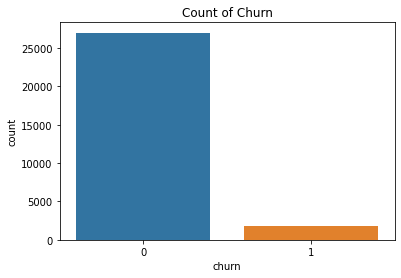

In [177]:
#plot the distribution of churn variable
plt.title("Count of Churn")
sns.countplot(data_hvc.churn,)
plt.show()

In [178]:
# checking class weight 
print(f" Weight of Churn : { round(np.sum(data_hvc.churn) * 100 / data_hvc.shape[0], 2)  }" )
print(f" Weight of NO Churn : { round(100 - ( np.sum(data_hvc.churn) * 100 / data_hvc.shape[0] ), 2) }" )

# 6 % of our data is churn customer
# 94 % of put data on no churn customer 

 Weight of Churn : 6.1
 Weight of NO Churn : 93.9


#### Data Cleaning

In [179]:
#deleting all month 9 data as we have to make prediction for those
data_hvc.drop(columns=[col for col in data_hvc.columns if col.endswith("9")], inplace=True)

In [180]:
# deleting mobile number anc circle id as they donot add any value

data_hvc.drop(columns=["mobile_number", "circle_id"], inplace=True)
data_hvc.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,rev_6_7,total_usages_6,total_usages_7,total_usages_8,churn
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,1209.5150,1113.99,1167.28,778.90,1
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,

In [181]:
data_hvc.isnull().sum()

loc_og_t2o_mou        0
std_og_t2o_mou        0
loc_ic_t2o_mou        0
arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8

In [182]:
# drop loc_ic_t2o_mou as it has all zero value

data_hvc.drop(columns=["loc_ic_t2o_mou"], inplace=True)

In [183]:
list((data_hvc.nunique() <= 5).values)

[True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [184]:
col_names = list(filterfalse(lambda col_name: data_hvc[col_name].nunique() >=2 , data_hvc.columns.values))
data_hvc.drop(columns=col_names, inplace=True)

#### Exploratory Data Analysis

In [185]:
def plotDistribution(df,col_names, n_cols=3, plot_type=None, suptitle=""):
  
  n_plots = len(col_names)
  if n_plots == 0 :
    raise ValueError("col_name should be list/tuple of columns")
  if n_plots == 1:
    n_rows = 1
    n_cols = 1
  else:
      rem = 0 if n_plots % n_cols == 0 else 1
      n_rows = int(n_plots / n_cols) + rem
  
  fig = plt.figure(figsize=[15, 3 * n_rows])
  for pos in trange(0, n_plots):
    plt.subplot(n_rows, n_cols, pos+1)
    plt.title(f"{col_names[pos]}")
    if plot_type == "hist":
      sns.histplot(df[col_names[pos]])
    else:
      sns.countplot(df[col_names[pos]])

  # plt.suptitle(f"Distribution of {suptitle} Columns")
  plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
  plt.show()
    


In [186]:
# incomming columns
col_names = list(sorted([col for col in data_hvc.columns if col.find("mou") != -1]))
for idx, col in enumerate([col for col in col_names if col.find("_ic_") != -1]):
  print(idx, col)

0 isd_ic_mou_6
1 isd_ic_mou_7
2 isd_ic_mou_8
3 loc_ic_mou_6
4 loc_ic_mou_7
5 loc_ic_mou_8
6 loc_ic_t2f_mou_6
7 loc_ic_t2f_mou_7
8 loc_ic_t2f_mou_8
9 loc_ic_t2m_mou_6
10 loc_ic_t2m_mou_7
11 loc_ic_t2m_mou_8
12 loc_ic_t2t_mou_6
13 loc_ic_t2t_mou_7
14 loc_ic_t2t_mou_8
15 roam_ic_mou_6
16 roam_ic_mou_7
17 roam_ic_mou_8
18 spl_ic_mou_6
19 spl_ic_mou_7
20 spl_ic_mou_8
21 std_ic_mou_6
22 std_ic_mou_7
23 std_ic_mou_8
24 std_ic_t2f_mou_6
25 std_ic_t2f_mou_7
26 std_ic_t2f_mou_8
27 std_ic_t2m_mou_6
28 std_ic_t2m_mou_7
29 std_ic_t2m_mou_8
30 std_ic_t2t_mou_6
31 std_ic_t2t_mou_7
32 std_ic_t2t_mou_8
33 total_ic_mou_6
34 total_ic_mou_7
35 total_ic_mou_8


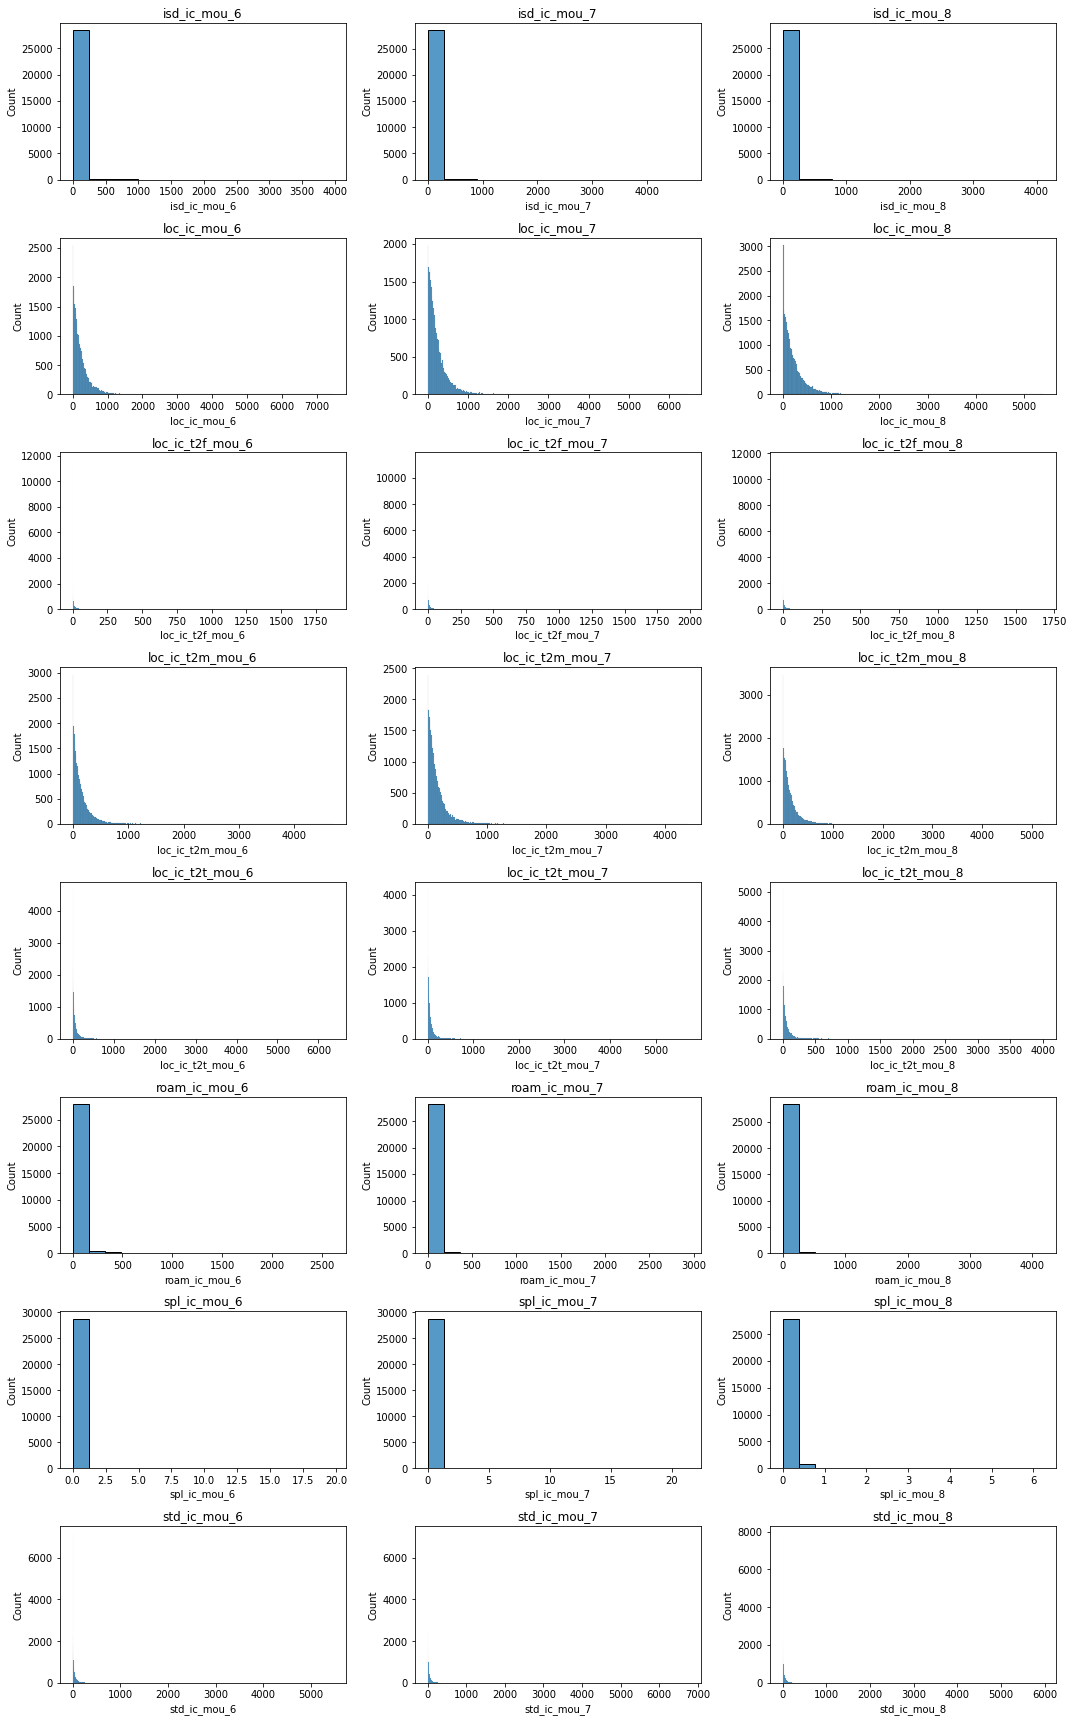

In [187]:
# plot for ic_mou columns
col_names = list(sorted([col for col in data_hvc.columns if col.find("mou") != -1]))
ic_cols = [col for col in col_names if col.find("_ic_") != -1]
plotDistribution(data_hvc, ic_cols[:24], plot_type='hist', suptitle="Incomming_calls")

Important Observations: - 
  - Roaming incoming, special incoming, incoming from fixed line of self are very minimum.
  - Incoming form other operator is in good portion.
  - Incomming from self operator is considerably less as compared to other operator.

In [188]:
# outgoing columns
col_names = list(sorted([col for col in data_hvc.columns if col.find("mou") != -1]))
for idx, col in enumerate([col for col in col_names if col.find("_og_") != -1]):
  print(idx, col)

0 isd_og_mou_6
1 isd_og_mou_7
2 isd_og_mou_8
3 loc_og_mou_6
4 loc_og_mou_7
5 loc_og_mou_8
6 loc_og_t2c_mou_6
7 loc_og_t2c_mou_7
8 loc_og_t2c_mou_8
9 loc_og_t2f_mou_6
10 loc_og_t2f_mou_7
11 loc_og_t2f_mou_8
12 loc_og_t2m_mou_6
13 loc_og_t2m_mou_7
14 loc_og_t2m_mou_8
15 loc_og_t2t_mou_6
16 loc_og_t2t_mou_7
17 loc_og_t2t_mou_8
18 roam_og_mou_6
19 roam_og_mou_7
20 roam_og_mou_8
21 spl_og_mou_6
22 spl_og_mou_7
23 spl_og_mou_8
24 std_og_mou_6
25 std_og_mou_7
26 std_og_mou_8
27 std_og_t2f_mou_6
28 std_og_t2f_mou_7
29 std_og_t2f_mou_8
30 std_og_t2m_mou_6
31 std_og_t2m_mou_7
32 std_og_t2m_mou_8
33 std_og_t2t_mou_6
34 std_og_t2t_mou_7
35 std_og_t2t_mou_8
36 total_og_mou_6
37 total_og_mou_7
38 total_og_mou_8


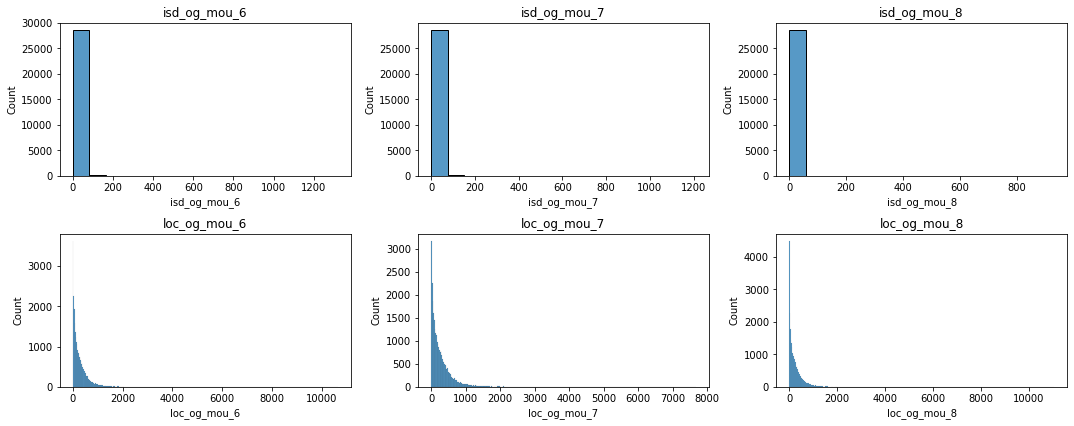

In [189]:
# plot outgoing columns
col_names = list(sorted([col for col in data_hvc.columns if col.find("mou") != -1]))
og_cols = [col for col in col_names if col.find("_og_") != -1]
plotDistribution(data_hvc, og_cols[:6], plot_type='hist', suptitle="Outgoing_calls")

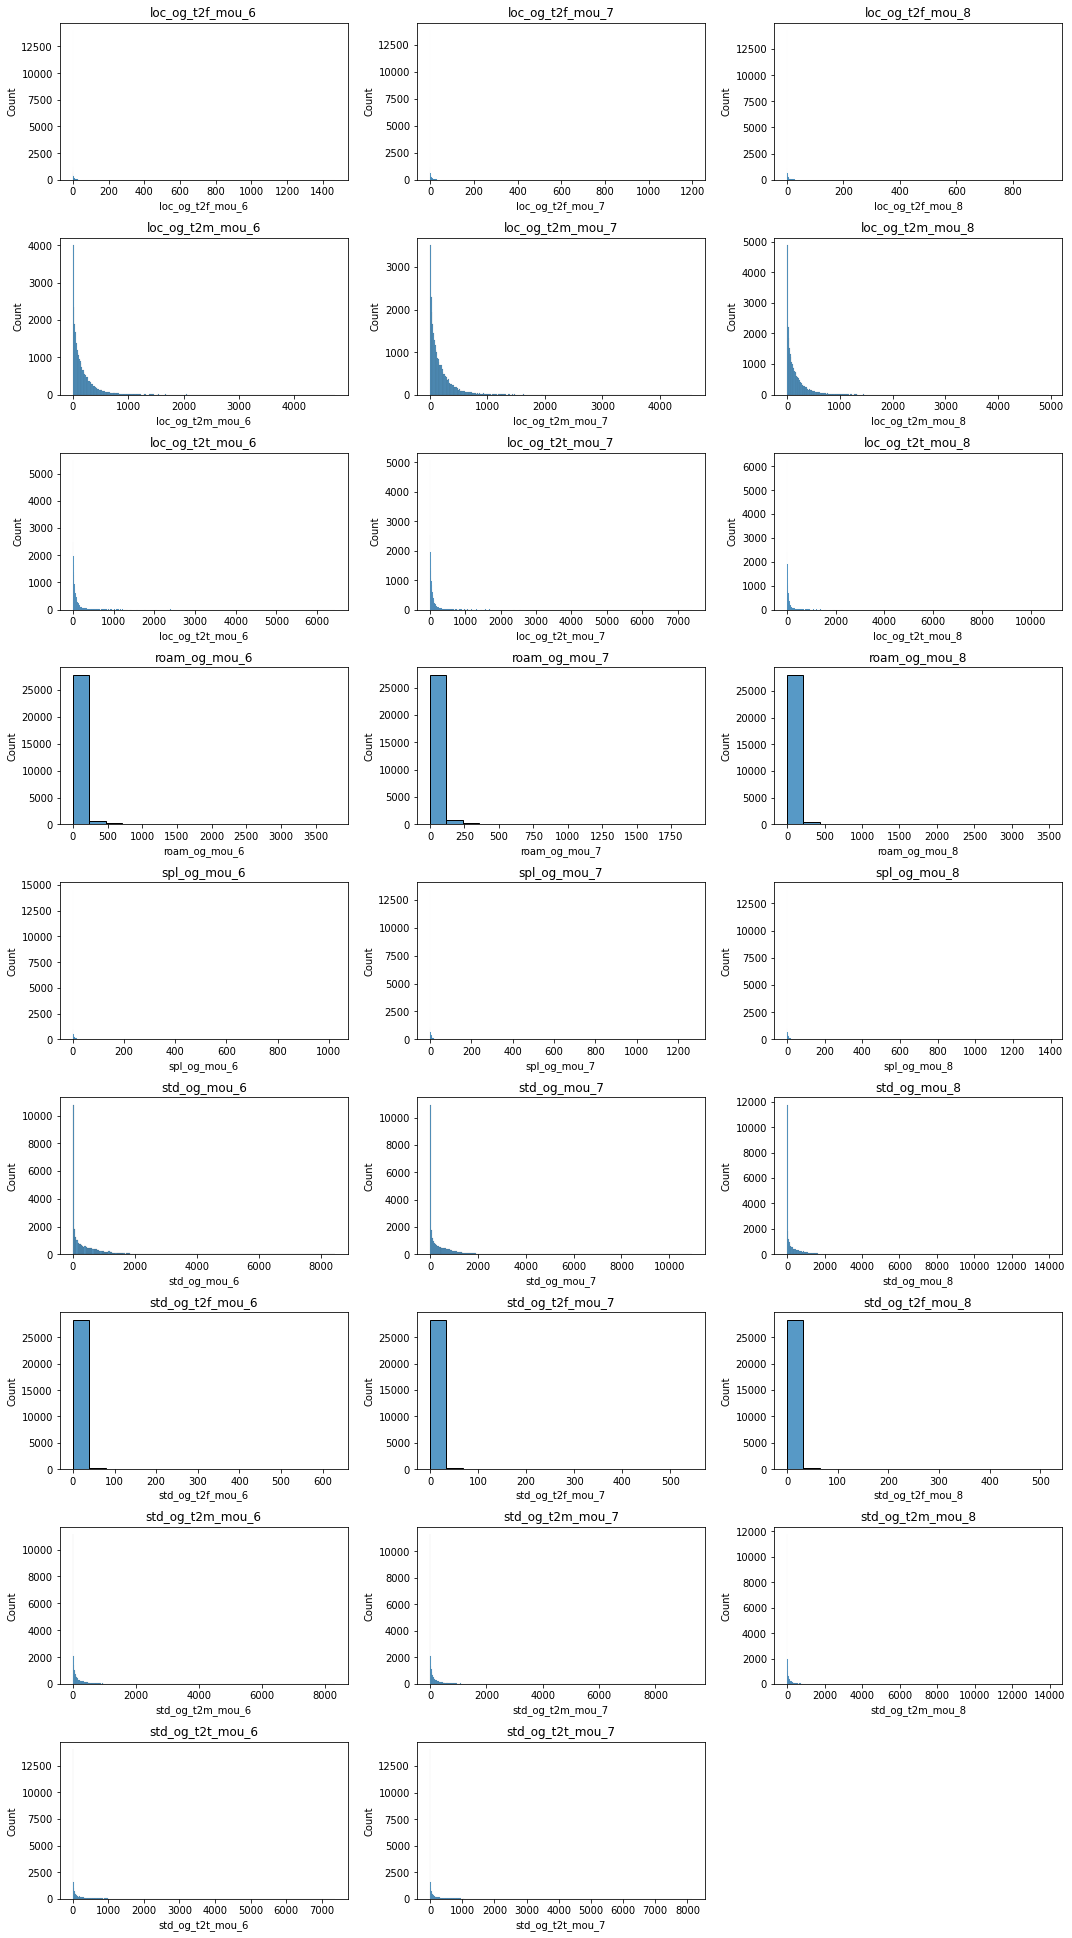

In [190]:
# plot outgoing columns
col_names = list(sorted([col for col in data_hvc.columns if col.find("mou") != -1]))
og_cols = [col for col in col_names if col.find("_og_") != -1]
plotDistribution(data_hvc, og_cols[9:35], plot_type='hist', suptitle="Outgoing_calls")

Important Observations:
  -  Maximum contribution to outgoing call in from local outgoing call.
  -  outgoing call to other mobile network is maximum
  -  isd, roaming outgoing calls are almost none.
  -  std outgoing call is very less.

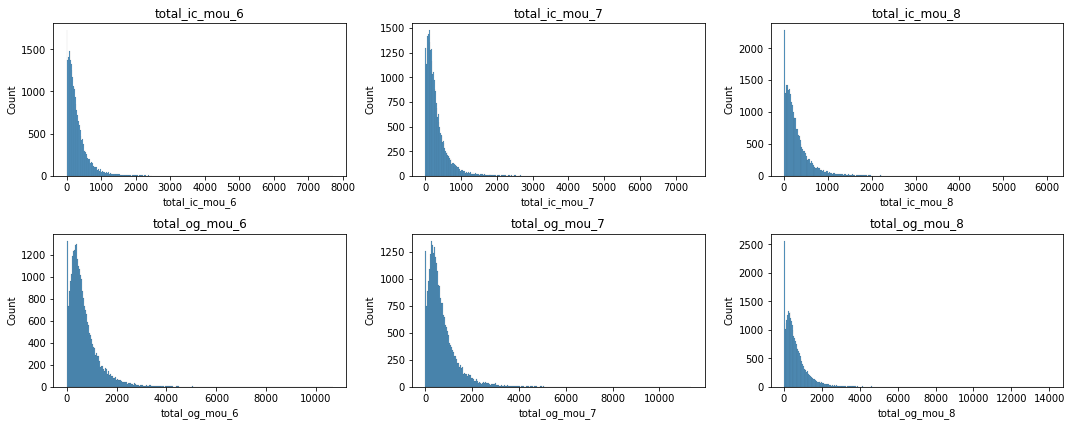

In [191]:
col_names = list(sorted([col for col in data_hvc.columns if col.find("total") != -1]))
total_cols = [col for col in col_names if col.find("_og_") != -1 or col.find("_ic_") != -1]
plotDistribution(data_hvc, total_cols, plot_type='hist', suptitle="total_calls")

Important Observations:
  - Volumn of outgoing calls are more as compared to incoming calls 
  - In month 8, both outgoing and incoming call volumns has declined.

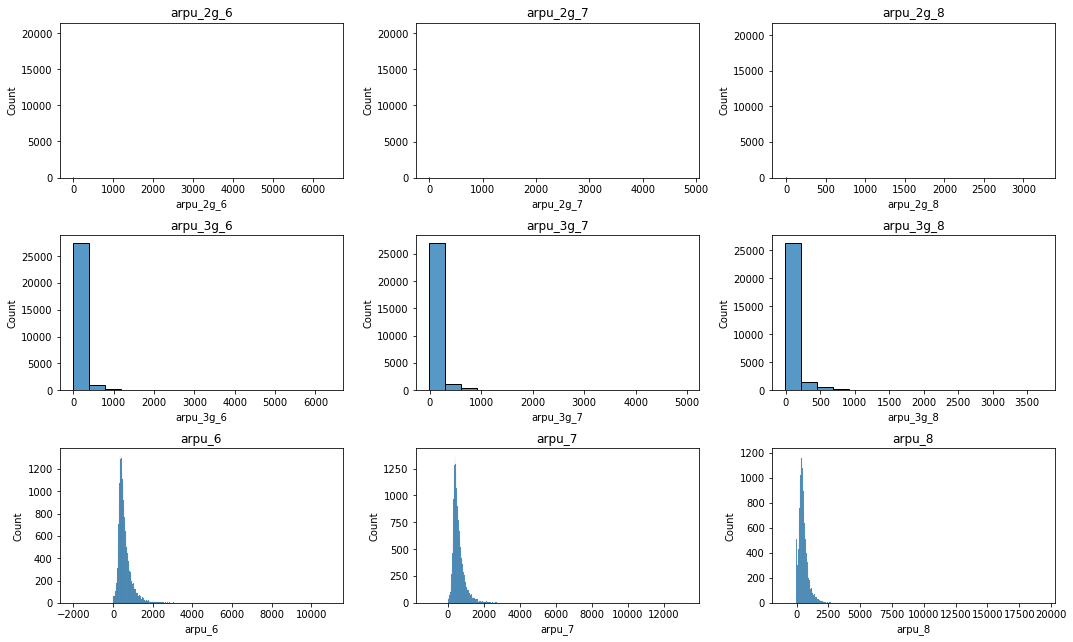

In [192]:
# plotting  revenue distribution
col_names = list(sorted([col for col in data_hvc.columns if col.find("arpu") != -1]))
plotDistribution(data_hvc, col_names, plot_type='hist', suptitle="total_calls")

Imporant Observations :- 
  - Revenue from 2G is almost none
  - Small section of customer has used the 3G services. 3G service seems to increase month 8.
  - Revenue from customer seems to increase marginally but majority is still on the lower side. 

In [193]:
corr_map = data_hvc.corr()

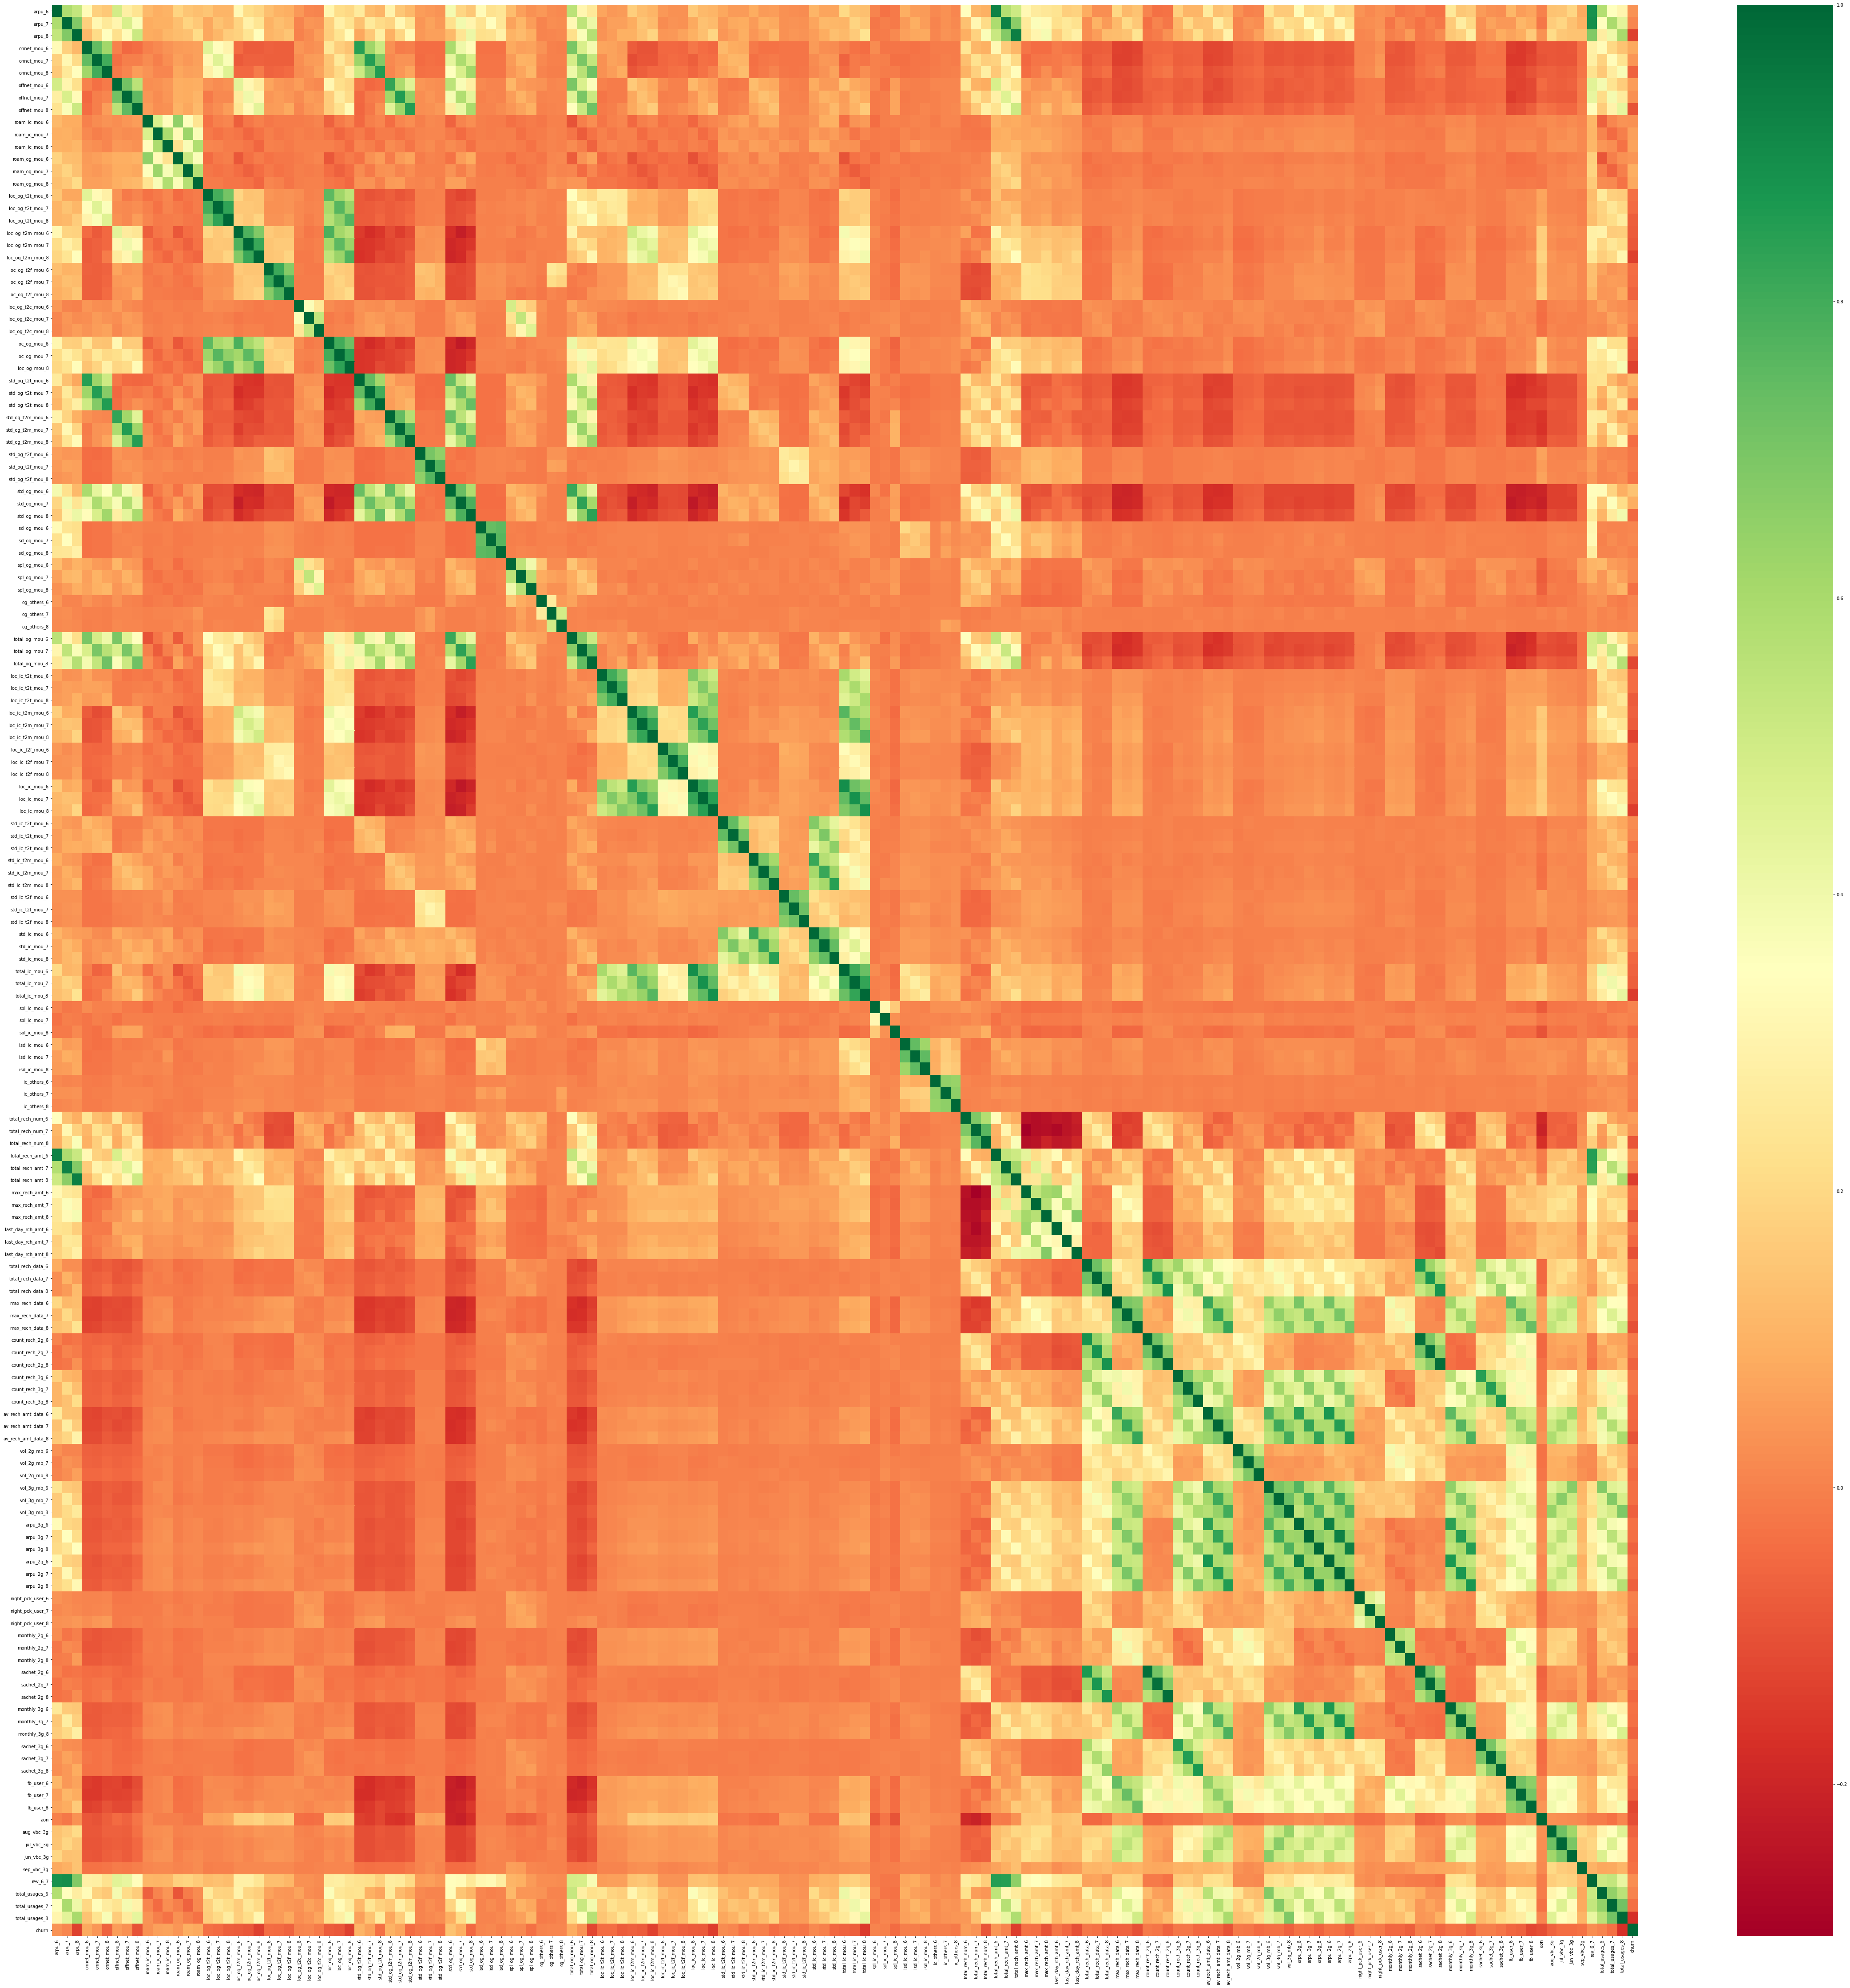

In [194]:
#plotting the correlation matrix.
plt.figure(figsize=[80,80])
sns.heatmap(corr_map, annot=False, cmap="RdYlGn")
plt.show()

Observation:
  - There is strong local corelation between data

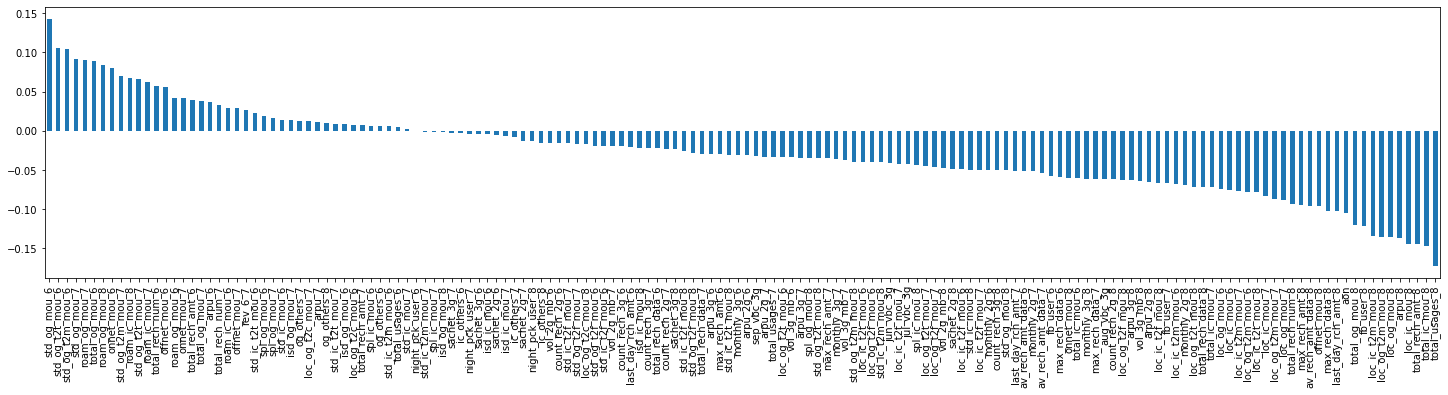

In [195]:
# correlation with respect to churn
plt.figure(figsize=[25,5])
corr_map['churn'].drop('churn').sort_values(ascending=False).plot(kind='bar')
plt.show()

In [196]:
corr_map[(corr_map.churn > 0.05)].index
# The chances ot churn is more if roaming minute of usages(incoming and outgoing), trunk dailing(outgoing), and total outgoing charges are more. 

Index(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_7', 'roam_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_mou_6', 'std_og_mou_7', 'total_og_mou_6', 'total_rech_num_6',
       'churn'],
      dtype='object')

In [197]:
corr_map[(corr_map.churn < - 0.1)].index

Index(['arpu_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8',
       'total_rech_amt_8', 'last_day_rch_amt_8', 'max_rech_data_8',
       'fb_user_8', 'aon', 'total_usages_8'],
      dtype='object')

observation:-
  - less churn
    - older customer 
    - higher revenue in month 8
    - higher outgoing and higher incomming in recent month
    - higher recharge in recent month

  - more churn
    - roaming minute of usages(incoming and outgoing)
    - trunk dailing(outgoing)
    - total outgoing charges are more.

In [198]:
def plotDistributionVsChurn(df, col_names, n_cols=4):
  n_plots = len(col_names)
  if n_plots == 0 :
    raise ValueError("col_name should be list/tuple of columns")
  if n_plots == 1:
    n_rows = 1
    n_cols = 1
  else:
      rem = 0 if n_plots % n_cols == 0 else 1
      n_rows = int(n_plots / n_cols) + rem
  
  fig = plt.figure(figsize=[15, 3 * n_rows])
  for pos in trange(0, n_plots):
    plt.subplot(n_rows, n_cols, pos+1)
    plt.title(f"{col_names[pos]}")
    sns.kdeplot(df[df.churn == 0][col_names[pos]], label="Not Churn")
    sns.kdeplot(df[df.churn == 1][col_names[pos]], label="Churn")
    
  # plt.suptitle(f"Distribution of {suptitle} Columns")
  plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
  plt.show()

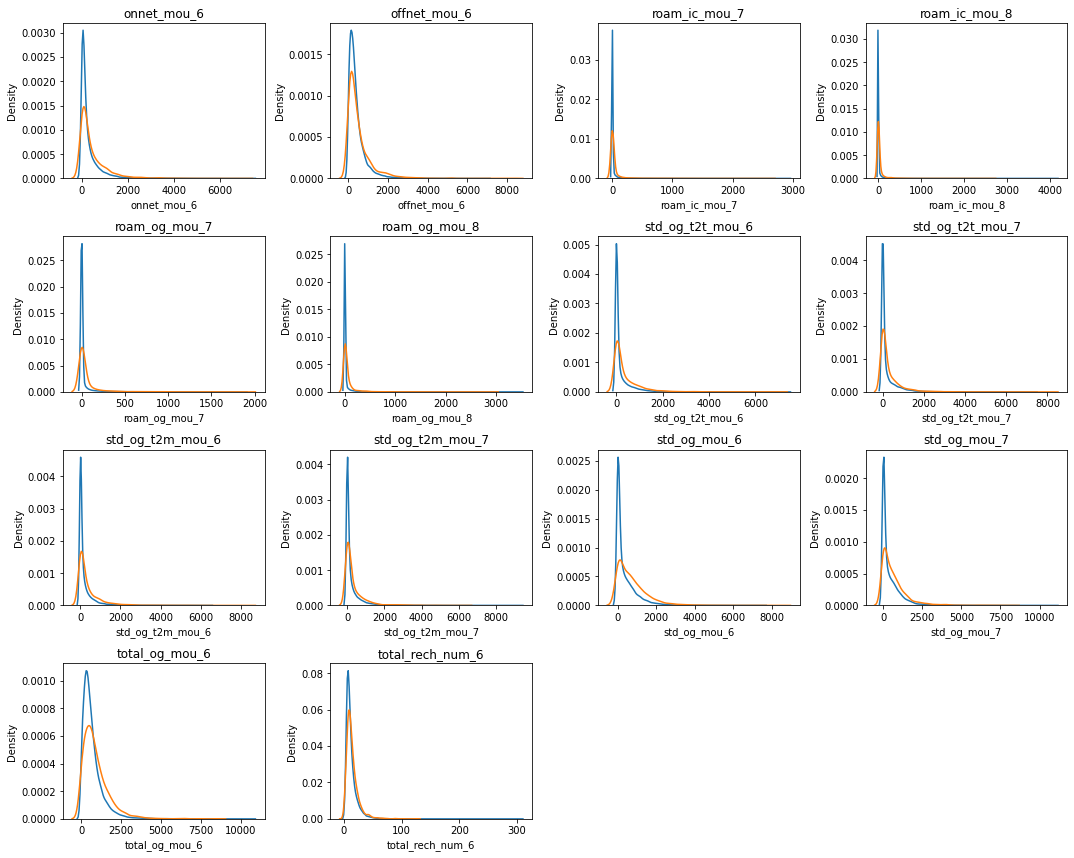

In [199]:
# plotting for positive correlation varibles Vs Churn
plotDistributionVsChurn(data_hvc, list(corr_map.churn.drop(index="churn")[corr_map.churn > 0.05].index))

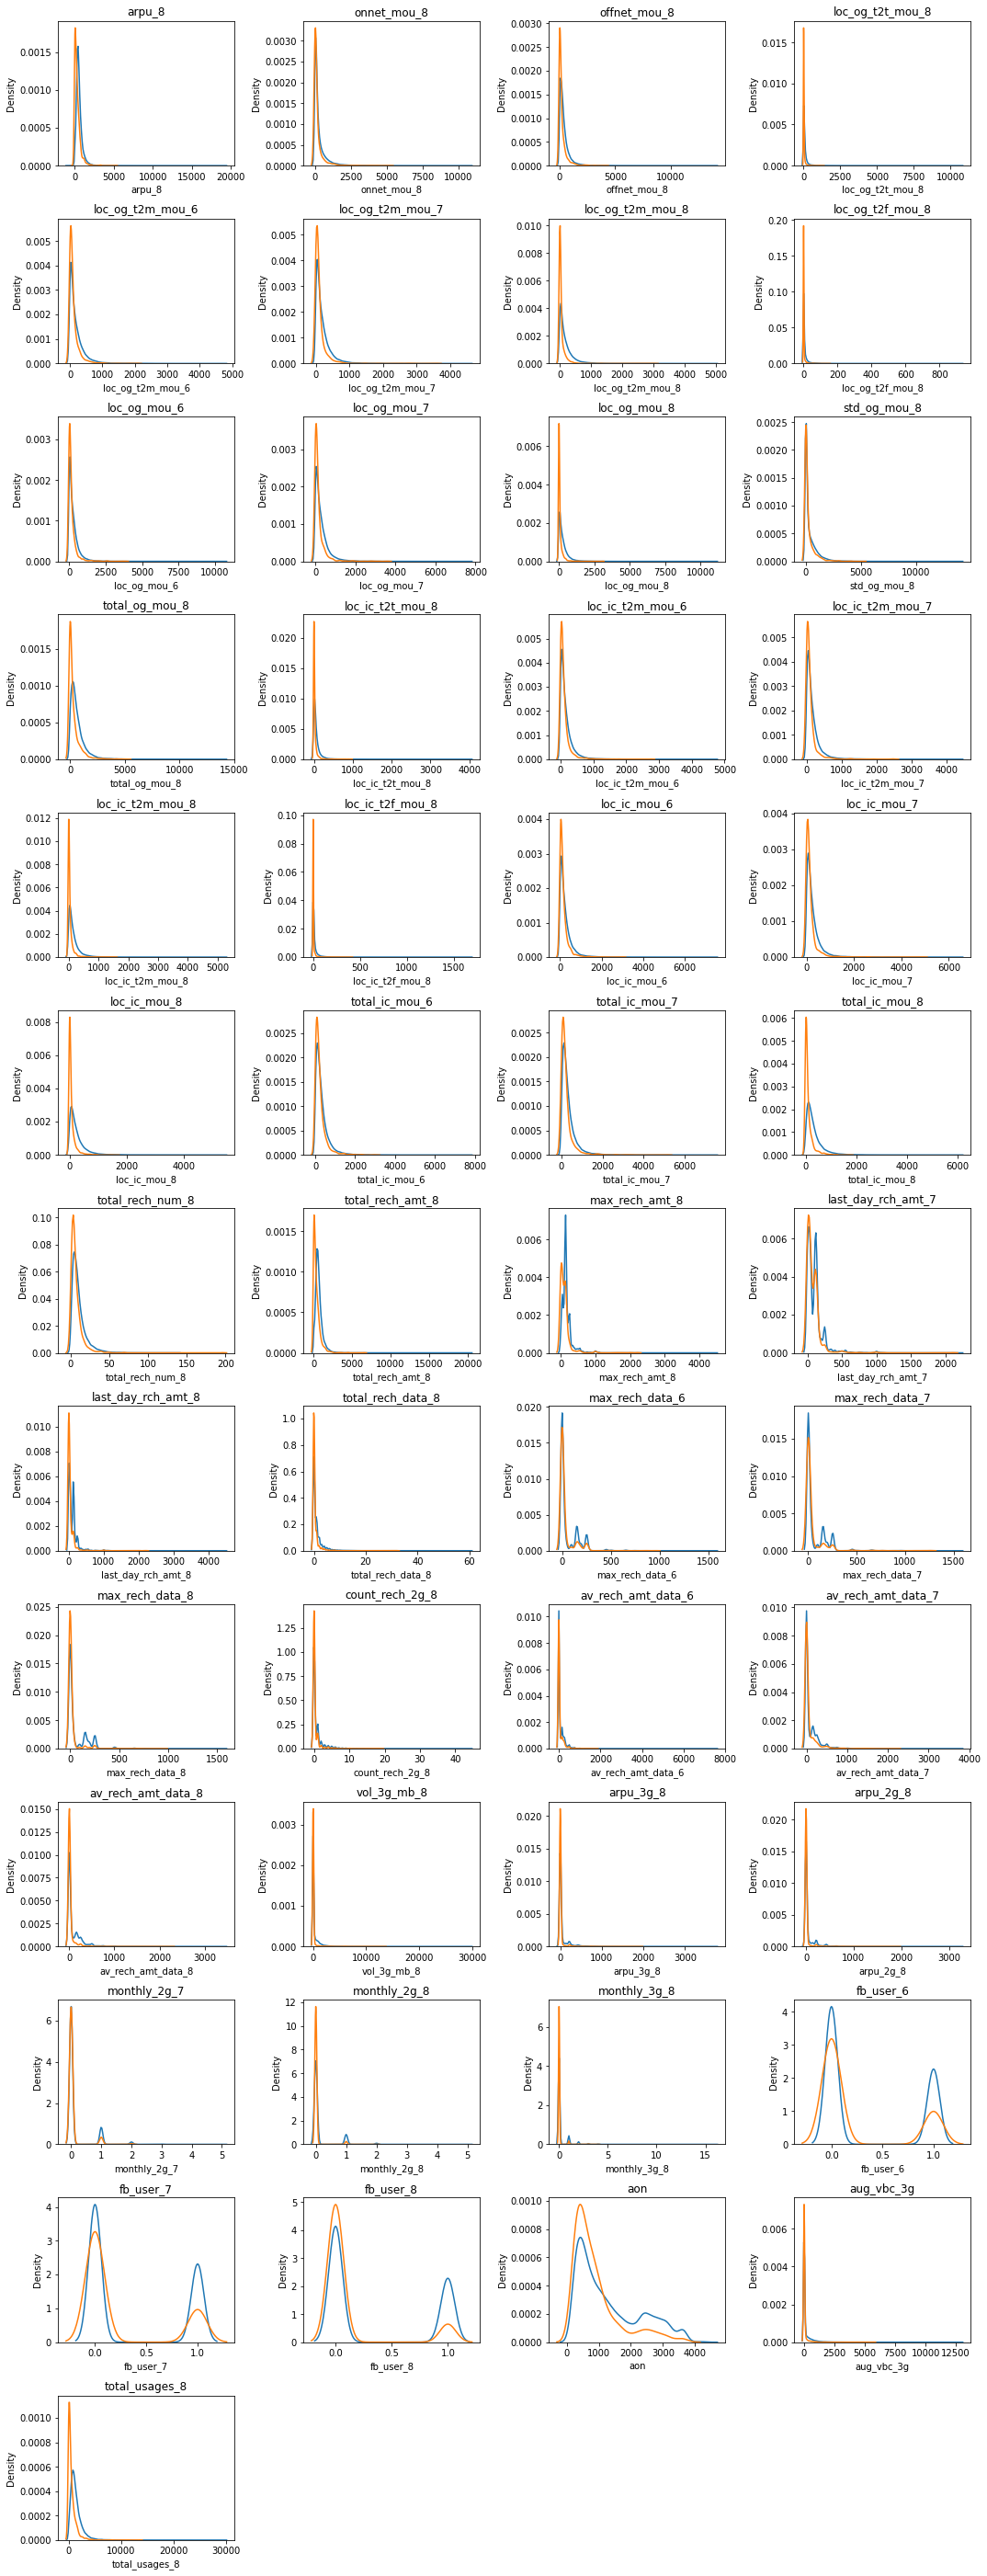

In [200]:
# plotting for positive correlation varibles Vs Churn
plotDistributionVsChurn(data_hvc, list(corr_map.churn.drop(index="churn")[corr_map.churn < -0.05].index))

#### Data Preparation

##### Set up

In [201]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import  SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

##### Train test split

In [202]:
data_y = data_hvc.churn
data_x = data_hvc.drop(columns='churn')

In [203]:
train_X, test_X, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42, stratify=data_y)

In [204]:
# check stratification
print(f"%age churn in overall data = {round(np.sum(data_hvc.churn)/data_hvc.shape[0],2)}")
print(f"%age churn in train set = {round(np.sum(train_y)/train_y.shape[0],2)}")
print(f"%age churn in test set = {round(np.sum(test_y)/test_y.shape[0],2)}")

%age churn in overall data = 0.06
%age churn in train set = 0.06
%age churn in test set = 0.06


##### Balancing the skewness

In [205]:
sampling_strategy = {1:0.5, 0:0.5}
smote = SMOTE(sampling_strategy = 1.0)
train_balanced_X, train_balanced_y = smote.fit_sample(train_X, train_y)

In [206]:
print(f"%age churn in train_balanced set = {round(np.sum(train_balanced_y)/train_balanced_y.shape[0],2)}")

%age churn in train_balanced set = 0.5


##### Scaling  data

In [207]:
scaler = StandardScaler()
scaled_train_X = pd.DataFrame(scaler.fit_transform(train_X), columns=train_X.columns)
scaled_train_X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,rev_6_7,total_usages_6,total_usages_7,total_usages_8
0,0.741142,0.901108,-0.331542,-0.651412,-0.631435,-0.583431,2.162533,2.602831,0.459541,-0.222844,-0.178520,-0.106015,-0.248087,-0.224316,-0.185342,-0.399274,-0.379018,-0.366390,-0.582159,-0.741986,-0.721922,-0.336075,-0.279207,-0.307043,0.115172,0.392920,0.068330,-0.647943,-0.737767,-0.711591,-0.469860,-0.468136,-0.429006,2.836637,3.319550,0.979707,-0.165589,-0.150278,-0.152464,1.619372,1.962709,0.380186,-0.08946,-0.081838,-0.080559,1.069727,0.681898,0.129117,1.166989,-0.021205,-0.017726,1.148895,1.447415,-0.044710,-0.307073,-0.148828,-0.309518,3.566978,1.296649,-0.382298,1.826982,10.258337,-0.190485,2.620866,2.515371,-0.455261,-0.199821,-0.193543,-0.205946,1.977887,0.421199,0.232044,-0.141538,-0.148390,-0.129594,1.249195,0.146374,0.027422,2.727710,2.183559,-0.415063,-0.421076,-0.10205,-0.240001,-0.161375,-0.163149,-0.155401,-0.090802,-0.113537,0.011200,3.224342,4.618374,2.450231,0.856835,0.654273,-0.331725,-0.408870,-0.806043,-0.869454,-0.011118,-0.702384,-0.684537,-0.438668,-0.45458,-0.454397,-0.564175,-0.571911,-0.553297,-0.3691,-0.380188,-0.401841,-0.29629,-0.301517,-0.282573,-0.490085,-0.509034,-0.501698,-0.285783,-0.28348,-0.26383,-0.322106,-0.344842,-0.332601,-0.32003,-0.322862,-0.323837,-0.335481,-0.339497,-0.336825,-0.100966,-0.100966,-0.095783,-0.341798,-0.349422,-0.329086,-0.300147,-0.314273,-0.342631,-0.299501,-0.300813,-0.298617,-0.162853,-0.166966,-0.154518,-0.731241,-0.742766,-0.719578,-0.240170,-0.341006,-0.337244,-0.317671,-0.134854,0.927475,1.298455,1.322287,-0.452142
1,-0.392356,-0.754243,-0.491523,0.320015,0.039118,0.557618,-0.611964,-0.566458,-0.311478,-0.222844,-0.178520,-0.177862,-0.248087,-0.224316,-0.206677,-0.402091,-0.382119,-0.362693,-0.740877,-0.756312,-0.678876,-0.336075,-0.332603,-0.302235,1.040495,

In [208]:
scaled_test_X = pd.DataFrame(scaler.transform(test_X), columns=test_X.columns)

In [209]:
balanced_scaler = StandardScaler()
scaled_train_balanced_X = pd.DataFrame(balanced_scaler.fit_transform(train_balanced_X), columns=train_X.columns)
scaled_train_balanced_X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,rev_6_7,total_usages_6,total_usages_7,total_usages_8
0,0.696488,0.845947,-0.057412,-0.690500,-0.647715,-0.521595,1.794819,2.317118,0.730846,-0.224719,-0.221426,-0.179060,-0.248092,-0.285378,-0.280925,-0.374648,-0.357232,-0.307613,-0.507995,-0.651582,-0.571694,-0.311526,-0.231719,-0.252696,0.102773,0.434463,0.133708,-0.574658,-0.656151,-0.565555,-0.547265,-0.511944,-0.397093,2.142072,2.776516,1.222925,-0.157649,-0.138968,-0.125271,1.140524,1.593382,0.531446,-0.101226,-0.079931,-0.075235,1.089170,0.770225,0.258097,1.441600,-0.015756,-0.013147,0.880403,1.265247,0.199255,-0.287213,-0.074091,-0.210788,4.237756,1.634897,-0.169734,2.405913,12.753039,-0.091800,3.240609,3.090194,-0.231673,-0.220488,-0.217801,-0.195010,2.305973,0.549472,0.403821,-0.142163,-0.144854,-0.112082,1.354417,0.208215,0.168114,3.289954,2.684219,-0.163327,-0.465243,-0.116176,-0.189406,-0.175648,-0.169598,-0.142396,-0.096685,-0.114089,0.060347,3.090944,4.678759,2.917393,0.794308,0.609408,-0.047196,-0.353132,-0.784396,-0.730010,0.049984,-0.699851,-0.553274,-0.428248,-0.436946,-0.394086,-0.51173,-0.507681,-0.440768,-0.376128,-0.376464,-0.361624,-0.273103,-0.276211,-0.235327,-0.448176,-0.459723,-0.400691,-0.27792,-0.266759,-0.220906,-0.284716,-0.302475,-0.259982,-0.291928,-0.301218,-0.261618,-0.311907,-0.318116,-0.271894,-0.101765,-0.099545,-0.081433,-0.300902,-0.310888,-0.260494,-0.322464,-0.323824,-0.318043,-0.273595,-0.275071,-0.237432,-0.16866,-0.171299,-0.139957,-0.67795,-0.672121,-0.578749,-0.044612,-0.278792,-0.299416,-0.280919,-0.102308,0.899879,1.359988,1.431908,-0.130232
1,-0.435906,-0.699626,-0.225340,0.155431,-0.033993,0.742671,-0.613215,-0.546895,-0.139840,-0.224719,-0.221426,-0.246981,-0.248092,-0.285378,-0.300808,-0.377862,-0.360976,-0.302804,-0.692667,-0.667794,-0.519024,-0.311526,-0.299593,-0.246472,0.939

In [210]:
scaled_test_balanced_X = pd.DataFrame(balanced_scaler.transform(test_X), columns=test_X.columns)

##### VIF to find multi-colinearity

In [211]:
# checking VIF on scaled train X
vif = pd.DataFrame()
vif['Features'] = scaled_train_X.columns
vif['VIF'] = [variance_inflation_factor(scaled_train_X.values, i) for i in range(scaled_train_X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[vif.VIF < 10]

,Features,VIF
107,max_rech_data_8,8.09
106,max_rech_data_7,8.09
105,max_rech_data_6,7.16
91,total_rech_num_7,5.77
145,fb_user_7,5.12
144,fb_user_6,4.72
92,total_rech_num_8,4.61
146,fb_user_8,4.54
149,jul_vbc_3g,3.97
98,max_rech_amt_8,3.95


##### Reduce Dimentionality using PCA

In [212]:
pca = PCA(n_components=.95)
pca.fit(scaled_train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [213]:
pca.n_components_

74

In [214]:
ds_train_X = pca.transform(scaled_train_X)
ds_test_X = pca.transform(scaled_test_X)

In [215]:
pca_balanced = PCA(n_components=.95)
pca_balanced.fit(scaled_train_balanced_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [216]:
pca_balanced.n_components_

73

In [217]:
dsb_train_X = pca_balanced.transform(scaled_train_balanced_X)
dsb_test_X = pca_balanced.transform(scaled_test_balanced_X)

#### Model Building for attribute identification

##### set up

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve


##### utility function

In [219]:
def show_metrics(model, X, y, threshold = 0.5):
  try:
    y_proba= model.predict_proba(X)
    y_pred = np.where(y_proba[:,1] > threshold, 1, 0)
  except:
    print("predict_proba not available")
    y_pred = model.predict(X)
  print(f"  Accuracy score: {round(accuracy_score(y,y_pred),2)}")
  print(f"        F1 Score: {round(f1_score(y, y_pred),2)}")
  print(f"Area under curve: {round(roc_auc_score(y, y_pred),2)}")
  print( "Confusson Matrix:") 
  print(confusion_matrix(y, y_pred))


In [220]:
def plot_metrics(model, X, y):
  plot_confusion_matrix(model, X, y)
  plot_precision_recall_curve(model, X, y)
  plot_roc_curve(model, X, y)

##### Models

###### Rfe for feature selection

In [222]:
lreg = LogisticRegression(class_weight={0:.06, 1:0.94}, random_state=42)
rfe = RFE(lreg, n_features_to_select=20)
rfe.fit(scaled_train_X, train_y)

RFE(estimator=LogisticRegression(C=1.0, class_weight={0: 0.06, 1: 0.94},
                                 dual=False, fit_intercept=True,
                                 intercept_scaling=1, l1_ratio=None,
                                 max_iter=100, multi_class='auto', n_jobs=None,
                                 penalty='l2', random_state=42, solver='lbfgs',
                                 tol=0.0001, verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

In [223]:
feature_ranking = pd.Series(rfe.ranking_, index=train_X.columns)
feature_ranking.sort_values(inplace=True)
feature_ranking

total_usages_8          1
og_others_7             1
og_others_8             1
loc_ic_t2m_mou_7        1
loc_ic_t2m_mou_8        1
loc_ic_mou_8            1
std_ic_t2t_mou_7        1
std_ic_t2t_mou_8        1
spl_ic_mou_8            1
total_rech_amt_8        1
std_og_t2t_mou_7        1
last_day_rch_amt_8      1
max_rech_amt_8          1
max_rech_data_8         1
sep_vbc_3g              1
onnet_mou_7             1
total_usages_6          1
arpu_8                  1
arpu_7                  1
loc_og_mou_8            1
aon                     2
total_usages_7          3
arpu_3g_8               4
monthly_3g_8            5
total_rech_data_8       6
roam_og_mou_7           7
total_rech_amt_7        8
total_rech_num_8        9
arpu_3g_6              10
std_ic_mou_8           11
monthly_2g_6           12
loc_og_t2f_mou_7       13
loc_og_t2f_mou_6       14
std_og_t2t_mou_8       15
offnet_mou_8           16
std_og_t2m_mou_7       17
loc_og_t2t_mou_8       18
offnet_mou_7           19
roam_og_mou_

In [224]:
top_features = list(feature_ranking[feature_ranking <= 1].index)
top_features

['total_usages_8',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'spl_ic_mou_8',
 'total_rech_amt_8',
 'std_og_t2t_mou_7',
 'last_day_rch_amt_8',
 'max_rech_amt_8',
 'max_rech_data_8',
 'sep_vbc_3g',
 'onnet_mou_7',
 'total_usages_6',
 'arpu_8',
 'arpu_7',
 'loc_og_mou_8']

In [225]:
# this column introduces multi-colinarity. so need to be dropped.
top_features.remove("total_rech_amt_8")

In [226]:
vif = pd.DataFrame()
vif['Features'] = top_features
vif['VIF'] = [variance_inflation_factor(scaled_train_X[top_features].values, i) for i in range(len(top_features))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,onnet_mou_7,6.40
9,std_og_t2t_mou_7,6.34
4,loc_ic_t2m_mou_8,5.73
5,loc_ic_mou_8,4.00
3,loc_ic_t2m_mou_7,3.30
0,total_usages_8,3.06
16,arpu_8,2.70
18,loc_og_mou_8,2.42
11,max_rech_amt_8,2.14
17,arpu_7,2.12


###### logistic regression with unbalanced samples

In [227]:
log_reg = LogisticRegression(class_weight={0:.06, 1:0.94}, random_state=42)
log_reg.fit(scaled_train_X[top_features], train_y)

LogisticRegression(C=1.0, class_weight={0: 0.06, 1: 0.94}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [228]:
# metrics on train set
show_metrics(log_reg, scaled_train_X[top_features], train_y)

  Accuracy score: 0.76
        F1 Score: 0.3
Area under curve: 0.79
Confusson Matrix:
[[16280  5307]
 [  240  1163]]


In [229]:
#metrics on test set
show_metrics(log_reg, scaled_test_X[top_features], test_y)

  Accuracy score: 0.77
        F1 Score: 0.3
Area under curve: 0.8
Confusson Matrix:
[[4127 1270]
 [  61  290]]


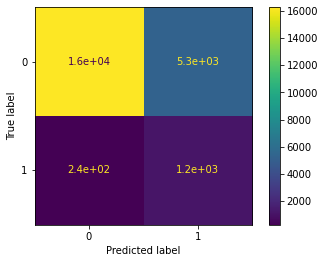

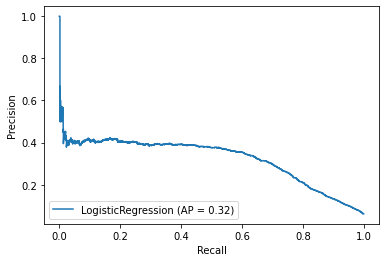

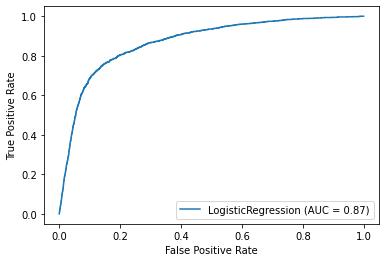

In [230]:
plot_metrics(log_reg, scaled_train_X[top_features], train_y)

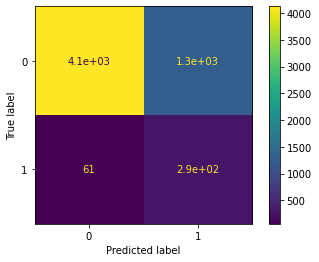

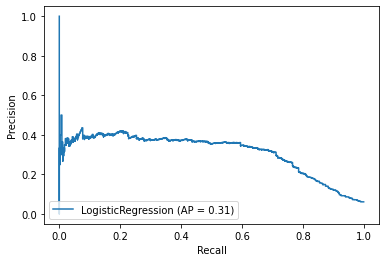

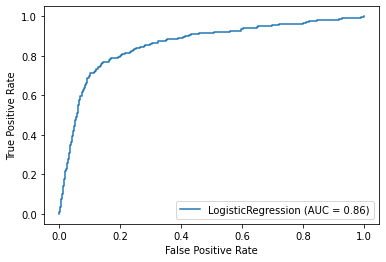

In [231]:
plot_metrics(log_reg, scaled_test_X[top_features], test_y)

In [232]:
# finding the best threshold
for thres in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
  print(f"Threshold Value :{thres}")
  print("*" * 30 )
  show_metrics(log_reg, scaled_train_X[top_features], train_y, thres)
  print()

# This shows that thres value for 0.7 is best suited.
# It has accuracy of 91% and F1 score of 0.43

Threshold Value :0.1
******************************
  Accuracy score: 0.33
        F1 Score: 0.15
Area under curve: 0.63
Confusson Matrix:
[[ 6172 15415]
 [   33  1370]]

Threshold Value :0.2
******************************
  Accuracy score: 0.46
        F1 Score: 0.18
Area under curve: 0.69
Confusson Matrix:
[[ 9333 12254]
 [   66  1337]]

Threshold Value :0.3
******************************
  Accuracy score: 0.57
        F1 Score: 0.21
Area under curve: 0.74
Confusson Matrix:
[[11886  9701]
 [  108  1295]]

Threshold Value :0.4
******************************
  Accuracy score: 0.67
        F1 Score: 0.25
Area under curve: 0.77
Confusson Matrix:
[[14178  7409]
 [  164  1239]]

Threshold Value :0.5
******************************
  Accuracy score: 0.76
        F1 Score: 0.3
Area under curve: 0.79
Confusson Matrix:
[[16280  5307]
 [  240  1163]]

Threshold Value :0.6
******************************
  Accuracy score: 0.84
        F1 Score: 0.37
Area under curve: 0.81
Confusson Matrix:
[[18278

In [233]:
# checking the same on test data
show_metrics(log_reg, scaled_test_X[top_features], test_y, 0.7)

  Accuracy score: 0.9
        F1 Score: 0.44
Area under curve: 0.78
Confusson Matrix:
[[4960  437]
 [ 129  222]]


###### logistic regression with balanced samples

In [234]:
log_reg_bal = LogisticRegression(random_state=42)
log_reg_bal.fit(scaled_train_balanced_X[top_features], train_balanced_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [235]:
#checking metrics on train data
show_metrics(log_reg_bal, scaled_train_balanced_X[top_features], train_balanced_y)

  Accuracy score: 0.8
        F1 Score: 0.81
Area under curve: 0.8
Confusson Matrix:
[[16674  4913]
 [ 3558 18029]]


In [236]:
#checking metrics on test data
show_metrics(log_reg_bal, scaled_test_balanced_X[top_features] , test_y)

  Accuracy score: 0.78
        F1 Score: 0.31
Area under curve: 0.8
Confusson Matrix:
[[4201 1196]
 [  66  285]]


In [237]:
# finding the best threshold
for thres in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
  print(f"Threshold Value :{thres}")
  print("*" * 30 )
  show_metrics(log_reg_bal, scaled_train_balanced_X[top_features], train_balanced_y, thres)
  print()

# threshold of 0.5 is best threshold. Accuracy = 82%, F1 score = 0.82, Roc = 0.82

Threshold Value :0.1
******************************
  Accuracy score: 0.66
        F1 Score: 0.74
Area under curve: 0.66
Confusson Matrix:
[[ 7375 14212]
 [  480 21107]]

Threshold Value :0.2
******************************
  Accuracy score: 0.72
        F1 Score: 0.77
Area under curve: 0.72
Confusson Matrix:
[[10433 11154]
 [  966 20621]]

Threshold Value :0.3
******************************
  Accuracy score: 0.76
        F1 Score: 0.79
Area under curve: 0.76
Confusson Matrix:
[[12766  8821]
 [ 1565 20022]]

Threshold Value :0.4
******************************
  Accuracy score: 0.79
        F1 Score: 0.8
Area under curve: 0.79
Confusson Matrix:
[[14809  6778]
 [ 2480 19107]]

Threshold Value :0.5
******************************
  Accuracy score: 0.8
        F1 Score: 0.81
Area under curve: 0.8
Confusson Matrix:
[[16674  4913]
 [ 3558 18029]]

Threshold Value :0.6
******************************
  Accuracy score: 0.81
        F1 Score: 0.81
Area under curve: 0.81
Confusson Matrix:
[[18331  

###### Interpreting coefficient

In [238]:
pd.Series(log_reg.coef_[0], index=top_features).sort_values(ascending=True)

loc_og_mou_8         -1.097731
total_usages_8       -0.879794
loc_ic_mou_8         -0.768152
std_og_t2t_mou_7     -0.674809
loc_ic_t2m_mou_8     -0.643934
og_others_8          -0.635930
std_ic_t2t_mou_8     -0.567632
spl_ic_mou_8         -0.522852
sep_vbc_3g           -0.484312
last_day_rch_amt_8   -0.452396
max_rech_data_8      -0.414069
og_others_7          -0.408315
arpu_8               -0.165106
max_rech_amt_8        0.252173
std_ic_t2t_mou_7      0.296265
total_usages_6        0.406687
arpu_7                0.524661
loc_ic_t2m_mou_7      0.532167
onnet_mou_7           0.834525
dtype: float64

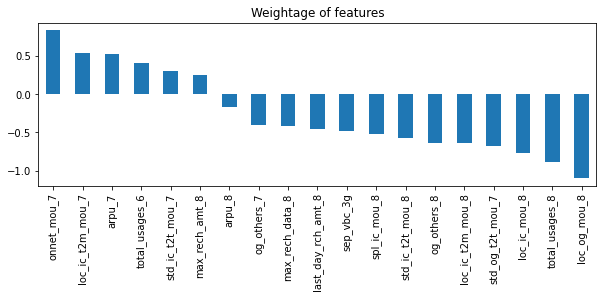

In [239]:
top_features_coef = pd.Series(log_reg.coef_[0], index=top_features).sort_values(ascending=False)
top_features_coef.plot(kind='bar', figsize=(10,3))
# pd.Series(log_reg.coef_[0], index=top_features).sort_values(ascending=False).plot(kind='bar', figsize=(20,5))
plt.title("Weightage of features")
plt.show()

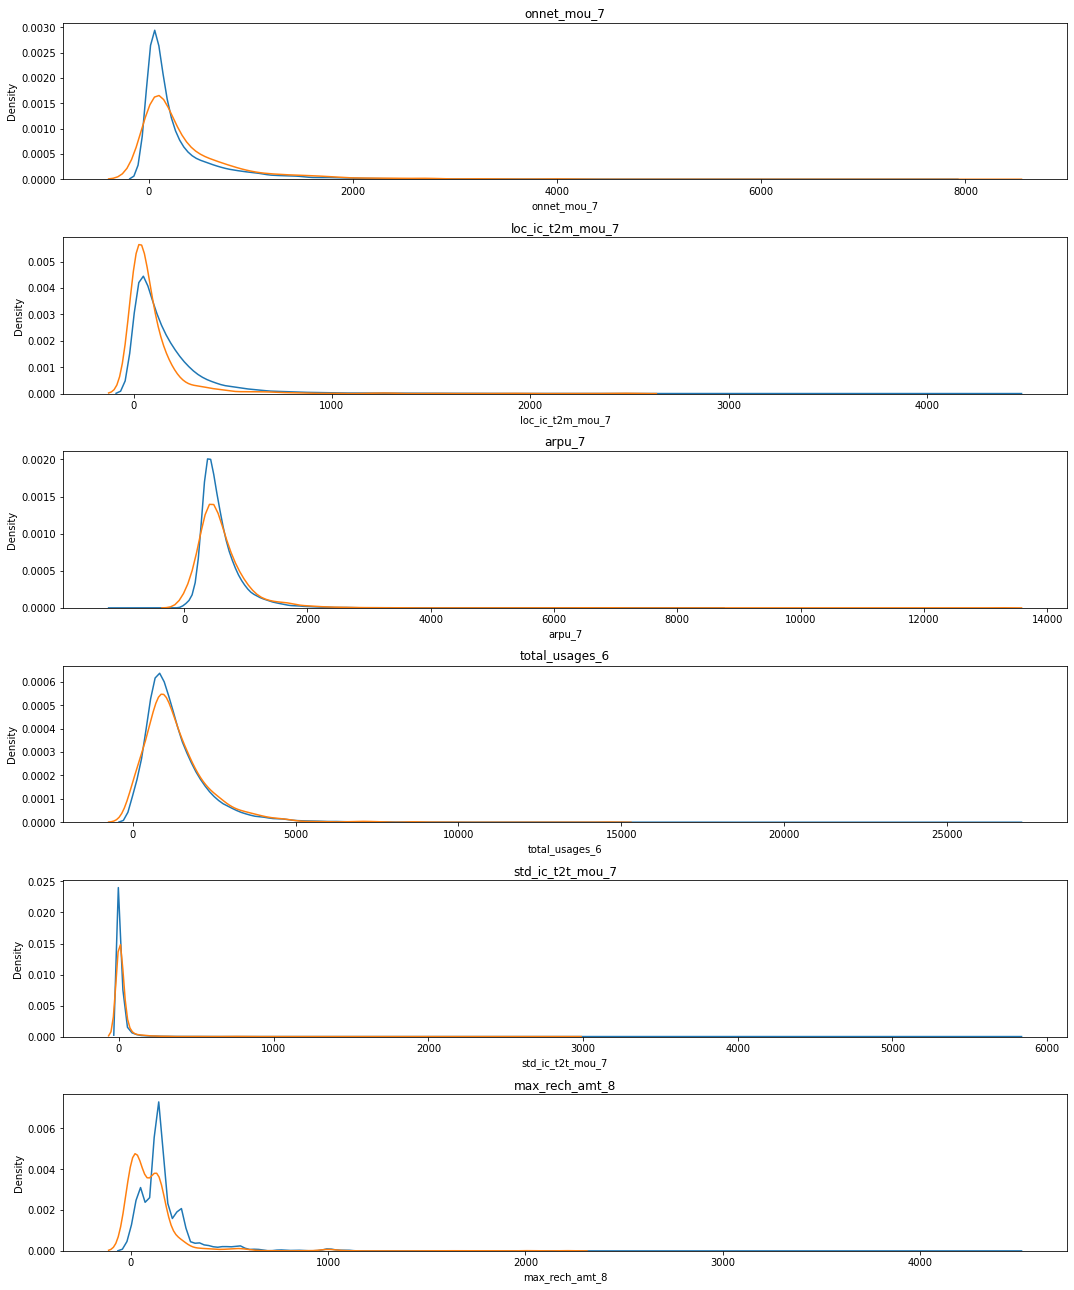

In [240]:
# Plotting the graph to these variables Wrt churn to verify model.
plotDistributionVsChurn(data_hvc, top_features_coef[top_features_coef > 0].index, n_cols=1)


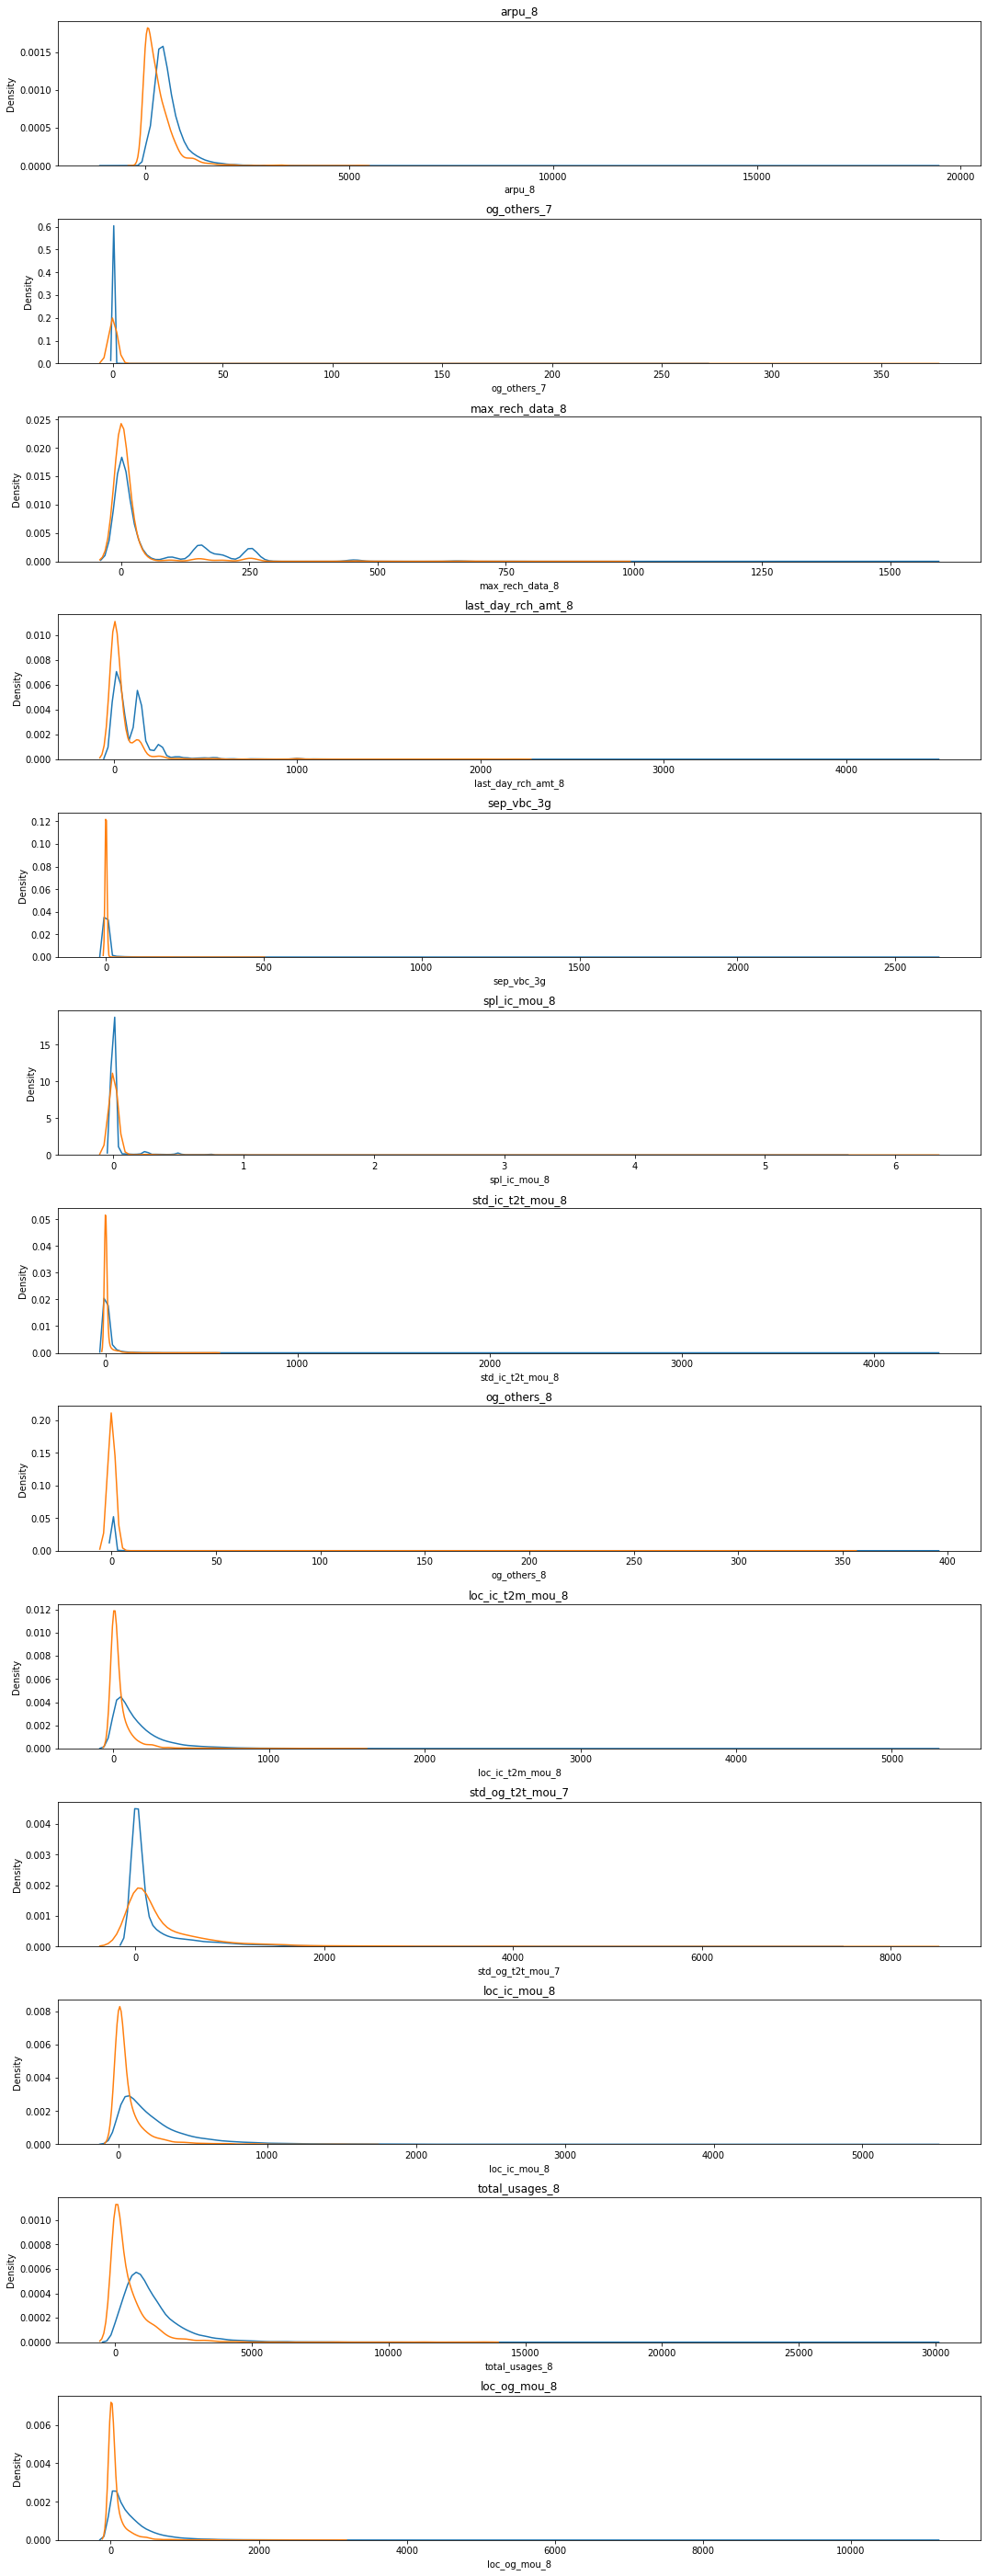

In [241]:
plotDistributionVsChurn(data_hvc, top_features_coef[top_features_coef < 0].index, n_cols=1)

###### RandomForest unbalanced samples

In [242]:
dtc = DecisionTreeClassifier(class_weight={0:0.06, 1:0.94}, random_state=42)
dtc.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.06, 1: 0.94},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42, splitter='best')

In [243]:
print("metrices for train data")
print("*" * 25)
show_metrics(dtc, train_X, train_y)

print()
print("metrices for test data")
print("*" * 25)
show_metrics(dtc, test_X, test_y)

# there is considerable drop in metrice.  Model is overfitting.

metrices for train data
*************************
  Accuracy score: 1.0
        F1 Score: 1.0
Area under curve: 1.0
Confusson Matrix:
[[21587     0]
 [    0  1403]]

metrices for test data
*************************
  Accuracy score: 0.92
        F1 Score: 0.33
Area under curve: 0.64
Confusson Matrix:
[[5160  237]
 [ 235  116]]


In [244]:
params = {
    "max_depth" : range(10, 40, 10),
    "min_samples_leaf" : range(20, 100, 10),
}

search = GridSearchCV(estimator=dtc, param_grid=params, scoring="roc_auc", cv=3, n_jobs=-1, return_train_score=True, verbose=True)
search.fit(train_X, train_y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 0.06, 1: 0.94},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_gri

In [245]:
best_dtc_model = search.best_estimator_

In [246]:
search.best_params_

{'max_depth': 20, 'min_samples_leaf': 90}

In [247]:
print("metrices for train data")
print("*" * 25)
show_metrics(best_dtc_model, train_X, train_y)

print()
print("metrices for test data")
print("*" * 25)
show_metrics(best_dtc_model, test_X, test_y)

metrices for train data
*************************
  Accuracy score: 0.82
        F1 Score: 0.38
Area under curve: 0.86
Confusson Matrix:
[[17583  4004]
 [  133  1270]]

metrices for test data
*************************
  Accuracy score: 0.8
        F1 Score: 0.34
Area under curve: 0.81
Confusson Matrix:
[[4334 1063]
 [  62  289]]


In [248]:
rfc = RandomForestClassifier(max_depth = 20, min_samples_leaf =90, class_weight={0:0.06, 1:0.94}, random_state=42)
params = {
"n_estimators":range(100, 501, 100),
# "min_samples_split" : range(50, 350, 50),
}

search = GridSearchCV(estimator=rfc, param_grid=params, scoring="roc_auc", cv=3, n_jobs=-1, return_train_score=True, verbose=True)
search.fit(train_X, train_y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.06, 1: 0.94},
                                              criterion='gini', max_depth=20,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=90,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                     

In [249]:
best_rfc_model = search.best_estimator_

In [250]:
print("metrices for train data")
print("*" * 25)
show_metrics(best_rfc_model, train_X, train_y)

print()
print("metrices for test data")
print("*" * 25)
show_metrics(best_rfc_model, test_X, test_y)

metrices for train data
*************************
  Accuracy score: 0.89
        F1 Score: 0.49
Area under curve: 0.86
Confusson Matrix:
[[19384  2203]
 [  244  1159]]

metrices for test data
*************************
  Accuracy score: 0.89
        F1 Score: 0.47
Area under curve: 0.84
Confusson Matrix:
[[4843  554]
 [  75  276]]


Observations:- 
  - Random Forest Classifier has performed better than the logistic regression  and Decision Tree.
  - We will use the Random Forest feature importance to identify important featues

In [251]:
feature_importance = pd.Series(best_rfc_model.feature_importances_, index=train_X.columns).sort_values(ascending=False)
feature_importance[:30]

total_usages_8        0.073899
roam_ic_mou_8         0.072012
loc_ic_mou_8          0.060938
roam_og_mou_8         0.057486
total_ic_mou_8        0.055838
loc_ic_t2m_mou_8      0.054035
last_day_rch_amt_8    0.052860
total_rech_amt_8      0.045158
loc_og_mou_8          0.045020
loc_og_t2m_mou_8      0.036819
total_og_mou_8        0.028199
loc_og_t2t_mou_8      0.024099
arpu_8                0.023847
loc_ic_t2t_mou_8      0.023789
loc_ic_t2f_mou_8      0.016212
av_rech_amt_data_8    0.012492
loc_og_t2f_mou_8      0.012041
offnet_mou_8          0.010424
std_og_mou_8          0.008722
std_og_mou_7          0.008592
max_rech_amt_8        0.008280
arpu_7                0.007871
std_ic_mou_8          0.007867
total_og_mou_7        0.007171
max_rech_data_8       0.006814
aon                   0.006609
total_usages_7        0.006175
std_og_mou_6          0.005995
onnet_mou_8           0.005969
total_rech_amt_7      0.005886
dtype: float64

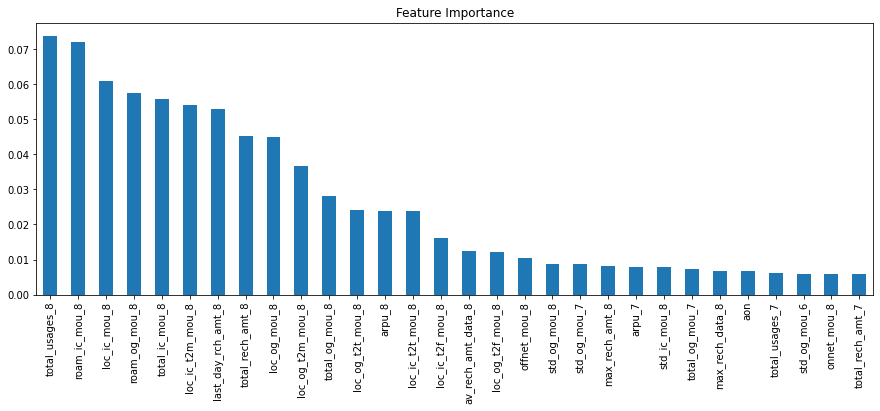

In [252]:
feature_importance[:30].plot(kind='bar', figsize=[15,5])
plt.title('Feature Importance')
plt.show()

#### Model Building for prediction

###### SVM

In [253]:
from sklearn.svm import SVC

In [254]:
svc = SVC(kernel="linear", random_state=42, class_weight="balanced")
svc.fit(ds_train_X, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [255]:
print("metrices for train data")
print("*" * 25)
show_metrics(svc, ds_train_X, train_y)

print("metrices for test data")
print("*" * 25)
show_metrics(svc, ds_test_X, test_y)

metrices for train data
*************************
predict_proba not available
  Accuracy score: 0.8
        F1 Score: 0.34
Area under curve: 0.81
Confusson Matrix:
[[17362  4225]
 [  259  1144]]
metrices for test data
*************************
predict_proba not available
  Accuracy score: 0.8
        F1 Score: 0.33
Area under curve: 0.8
Confusson Matrix:
[[4345 1052]
 [  71  280]]


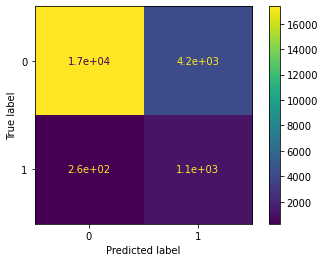

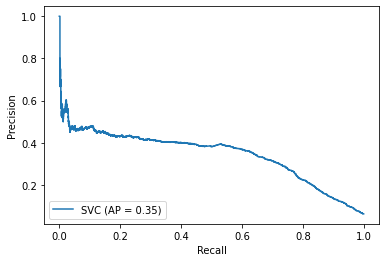

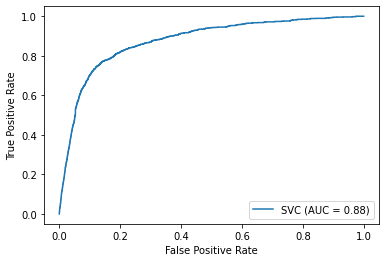

In [256]:
plot_metrics(svc, ds_train_X, train_y)

###### XG BOOST

In [257]:
import xgboost as xgb

In [258]:
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(ds_train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [259]:
print("metrices for train data")
print("*" * 25)
show_metrics(xgb_clf, ds_train_X, train_y)

print("metrices for test data")
print("*" * 25)
show_metrics(xgb_clf, ds_test_X, test_y)

metrices for train data
*************************
  Accuracy score: 0.95
        F1 Score: 0.28
Area under curve: 0.58
Confusson Matrix:
[[21526    61]
 [ 1169   234]]
metrices for test data
*************************
  Accuracy score: 0.94
        F1 Score: 0.16
Area under curve: 0.55
Confusson Matrix:
[[5367   30]
 [ 317   34]]


In [260]:
params = {
    "max_depth": [3,6,9,12,15],
    "n_estimators":[100, 150, 200, 250],
}

search = GridSearchCV(estimator=xgb_clf, param_grid=params, scoring="f1", cv=3, n_jobs=-1, return_train_score=True, verbose=True)
search.fit(ds_train_X, train_y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 28.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12, 15],
                         'n_estimators': [100, 150, 200, 250]},
             pre_dispatch='2*n_jobs', refit=True, return_

In [261]:
search.best_params_

{'max_depth': 3, 'n_estimators': 250}

In [262]:
best = search.best_score_

In [263]:
best_xgb_clf = search.best_estimator_

In [264]:
print("metrices for train data")
print("*" * 25)
show_metrics(best_xgb_clf, ds_train_X, train_y)

print("metrices for test data")
print("*" * 25)
show_metrics(best_xgb_clf, ds_test_X, test_y)

metrices for train data
*************************
  Accuracy score: 0.96
        F1 Score: 0.49
Area under curve: 0.67
Confusson Matrix:
[[21520    67]
 [  922   481]]
metrices for test data
*************************
  Accuracy score: 0.94
        F1 Score: 0.22
Area under curve: 0.56
Confusson Matrix:
[[5350   47]
 [ 303   48]]


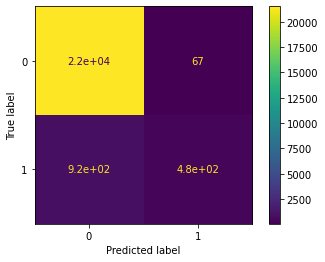

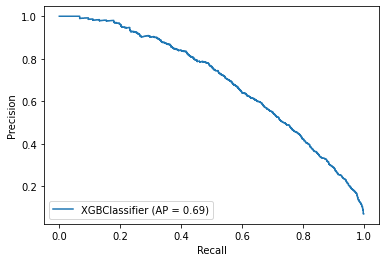

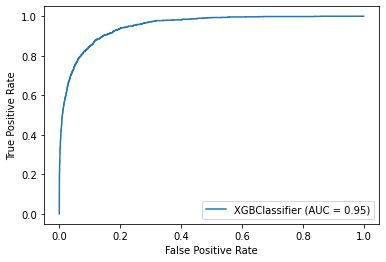

In [265]:
plot_metrics(best_xgb_clf, ds_train_X, train_y)

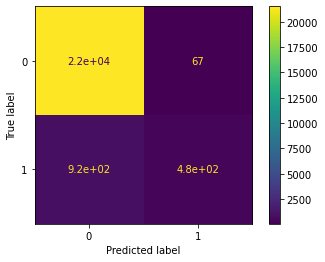

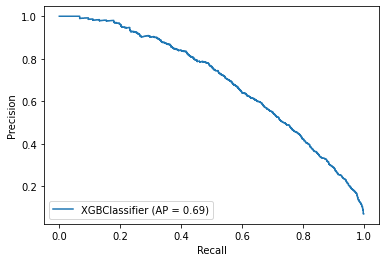

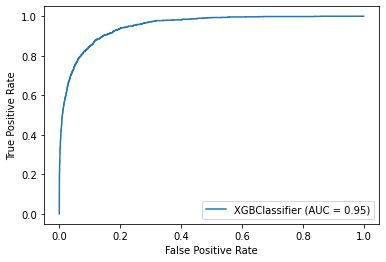

In [266]:
plot_metrics(best_xgb_clf, ds_train_X, train_y)

In [267]:
params = {
    "n_estimators":[250, 350, 450, 550],
}
estimator = xgb.XGBClassifier(max_depth=3,random_state=42)
search = GridSearchCV(estimator=estimator, param_grid=params, scoring="f1", cv=3, n_jobs=-1, return_train_score=True, verbose=True)
search.fit(ds_train_X, train_y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  5.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': [250, 350, 450, 550]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=True

In [268]:
search.best_params_

{'n_estimators': 450}

In [269]:
best_xgb_clf1 = search.best_estimator_

In [270]:
print("metrices for train data")
print("*" * 25)
show_metrics(best_xgb_clf1, ds_train_X, train_y)

print()
print("metrices for test data")
print("*" * 25)
show_metrics(best_xgb_clf1, ds_test_X, test_y)

metrices for train data
*************************
  Accuracy score: 0.97
        F1 Score: 0.66
Area under curve: 0.75
Confusson Matrix:
[[21548    39]
 [  699   704]]

metrices for test data
*************************
  Accuracy score: 0.94
        F1 Score: 0.2
Area under curve: 0.56
Confusson Matrix:
[[5345   52]
 [ 306   45]]


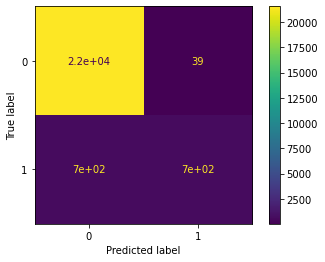

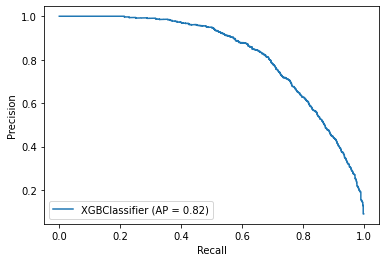

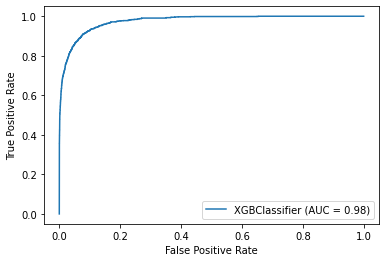

In [271]:
plot_metrics(search.best_estimator_, ds_train_X, train_y)

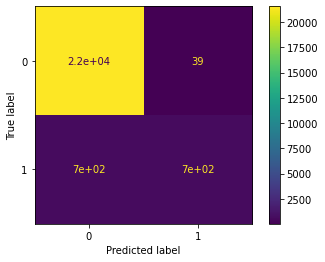

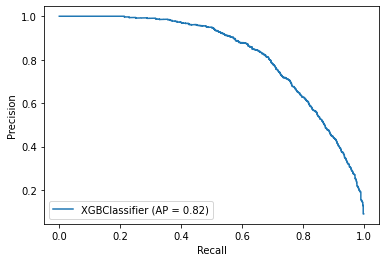

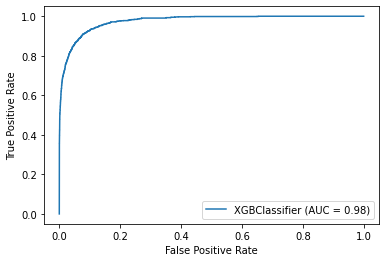

In [272]:
plot_metrics(search.best_estimator_, ds_train_X, train_y)

In [273]:
# finding the best threshold level
for thres in [i/10 for i in range(1, 10)]:
  print(f"Threshold level :- {thres}")
  print("*" * 20)
  show_metrics(best_xgb_clf1, ds_train_X, train_y, thres)
  print()
  print()

# best thresold value is comming at 0.3

Threshold level :- 0.1
********************
  Accuracy score: 0.92
        F1 Score: 0.57
Area under curve: 0.91
Confusson Matrix:
[[19769  1818]
 [  121  1282]]


Threshold level :- 0.2
********************
  Accuracy score: 0.96
        F1 Score: 0.69
Area under curve: 0.89
Confusson Matrix:
[[20808   779]
 [  252  1151]]


Threshold level :- 0.3
********************
  Accuracy score: 0.97
        F1 Score: 0.73
Area under curve: 0.85
Confusson Matrix:
[[21229   358]
 [  386  1017]]


Threshold level :- 0.4
********************
  Accuracy score: 0.97
        F1 Score: 0.73
Area under curve: 0.81
Confusson Matrix:
[[21442   145]
 [  520   883]]


Threshold level :- 0.5
********************
  Accuracy score: 0.97
        F1 Score: 0.66
Area under curve: 0.75
Confusson Matrix:
[[21548    39]
 [  699   704]]


Threshold level :- 0.6
********************
  Accuracy score: 0.96
        F1 Score: 0.5
Area under curve: 0.67
Confusson Matrix:
[[21580     7]
 [  927   476]]


Threshold level :

In [274]:
thres = 0.3
print("metrices for train data")
print("*" * 25)
show_metrics(best_xgb_clf1, ds_train_X, train_y, thres)

print()
print("metrices for test data")
print("*" * 25)
show_metrics(best_xgb_clf1, ds_test_X, test_y, thres)

metrices for train data
*************************
  Accuracy score: 0.97
        F1 Score: 0.73
Area under curve: 0.85
Confusson Matrix:
[[21229   358]
 [  386  1017]]

metrices for test data
*************************
  Accuracy score: 0.93
        F1 Score: 0.42
Area under curve: 0.69
Confusson Matrix:
[[5208  189]
 [ 206  145]]


#### Conclusion

Output :- 
  1. EDA charts are provided to gain the insight of customer behaviour.
  2. Logistic regression model has been trained to find the critical attributes and there impact on customer churn.
  3. Random Forest Classifier has been trained to find the decision making attributes and their order.
  4. XGBoost model has been trained to identify the churn customers with accuracy of 97% at threshold value of 0.3

Top 15 variables and their constribution to customer churn



    loc_og_mou_8         -1.097731
    total_usages_8       -0.879794
    loc_ic_mou_8         -0.768152
    std_og_t2t_mou_7     -0.674809
    loc_ic_t2m_mou_8     -0.643934
    og_others_8          -0.635930
    std_ic_t2t_mou_8     -0.567632
    spl_ic_mou_8         -0.522852
    sep_vbc_3g           -0.484312
    last_day_rch_amt_8   -0.452396
    max_rech_data_8      -0.414069
    og_others_7          -0.408315
    arpu_8               -0.165106
    max_rech_amt_8        0.252173
    std_ic_t2t_mou_7      0.296265
    total_usages_6        0.406687
    arpu_7                0.524661
    loc_ic_t2m_mou_7      0.532167
    onnet_mou_7           0.834525

Weight of Variables


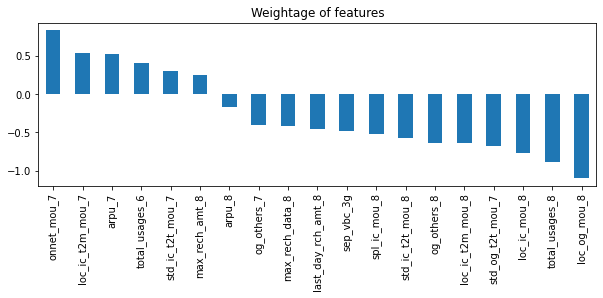

Important Features


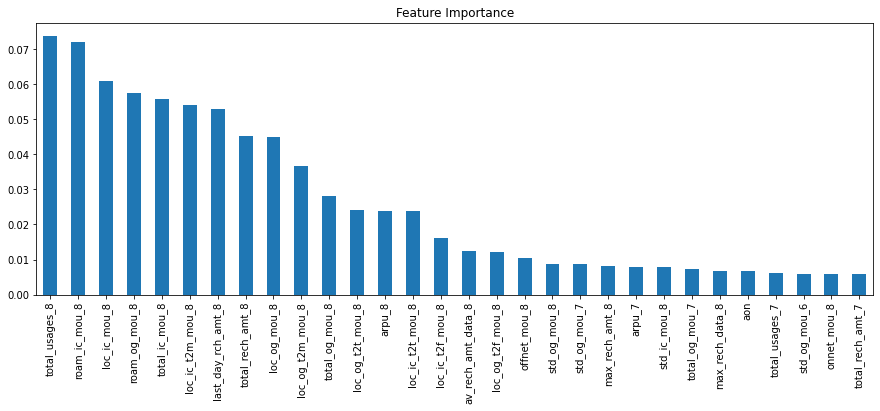

Recommendations:- 

  1. Behaviour of customer in recent past month is critical for predicting churn.
  2. Customers whoes usages of serice is high in month 8 are less likey to churn.
  3. Customers who were using the serice well in month 7 but have stopped using the service in month 8 is most likely to churn.
  4. Customers want to save spending on telecom bill. If his expenditure is more than 1000 in month 7, he is more likely to churn. Please give him offers analysing the pattern of usages(more std call, more local call etc).
  5. There seems to issue with services with in the telecmome provider network call as customer who makes and receives call within the service provdiver network tends to churn more.


**Thank You**